# HYPERPARAMETER Database Algorithms Data Science Project

# Abstract:
### Hyperparameters are the parameters that are specified prior to running Machine Learning algorithms.
### The prior knowledge about the hyperparameters and their ranges and their impact must be known in advance before running the algorithm through the hyperparameter values.
### In this project H2O is being run on the Data Set to geenrate various models for different run times generating different hyperparameters.
### The range of the hyperparameters for the given algorithms are then figured out and also cross validated to obtain the best hyperparameters for the best model

In [1]:
#Load the necessary libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import random, os, sys
from datetime import datetime
import time
import json

In [2]:
# Loading the data set using pandas
df=pd.read_csv("kc_house_data.csv", sep=',')#We give decimal=',' to show that we are reading the comma separated file

In [3]:
pd.set_option('display.max_columns', 500)

In [13]:
#To show the first 5 rows of the table and check if the data is correct
df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [14]:
#To check the statistical properties like mean standard deviation etc of the data set
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [15]:
df.shape

(21613, 21)

In [16]:
#To check the data types
df.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [17]:
#To show the total NULL Values present in the NULL Valued fields
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
#To print the sum of the total number of NULL Values in the data set
df.isnull().sum().sum()

0

## Since there are no NULL values in the Dataset we can directly read the files using h2o and perform the analysis sing h2o

In [2]:
import h2o
from h2o.automl import H2OAutoML
import json

In [3]:
h2o.init(strict_version_check=False) # starting h2o

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Samartha\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Samartha\AppData\Local\Temp\tmp5neo5lrj
  JVM stdout: C:\Users\Samartha\AppData\Local\Temp\tmp5neo5lrj\h2o_Samartha_started_from_python.out
  JVM stderr: C:\Users\Samartha\AppData\Local\Temp\tmp5neo5lrj\h2o_Samartha_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  -------------------------------
H2O cluster uptime:         04 secs
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.1.3
H2O cluster version age:    3 months
H2O cluster name:           H2O_from_python_Samartha_dom8xe
H2O cluster total nodes:    1
H2O cluster free memory:    1.750 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         AutoML, Algos, Core V3, Core V4
Python version:             3.7.1 final
--------------------------  -------------------------------

In [4]:
import os

In [5]:
df = h2o.import_file("kc_house_data.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
df.describe()

Rows:21613
Cols:21




id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 
 
 
 type int enum int int real int int real int int int int int int int int int real real int int 
 mins 1000102.0 75000.0 0.0 0.0 290.0 520.0 1.0 0.0 0.0 1.0 1.0 290.0 0.0 1900.0 0.0 98001.0 47.1559 -122.519 399.0 651.0 
 mean 4580301520.864986 540182.1587933188 3.37084162309721 2.1147573219821405 2079.899736269837 15106.967565816869 1.4943089807060563 0.007541757275713691 0.23430342849211128 3.40942951001712 7.656873178179799 1788.3906907879523 291.50904548188583 1971.0051357978994 84.40225790033776 98077.93980474718 47.56005251931708 -122.21389640494147 1986.5524915560077 12768.455651691109 
 maxs 9900000190.0 7700000.0 33.0 8.0 13540.0 1651359.0 3.5 1.0 4.0 5.0 13.0 9410.0 4820.0 2015.0 2015.0 98199.0 47.7776 -121.315 6210.0 871200.0 
 sigma 2876565571.3120565 367362.2317180084 0.9300618311474517 0.7701631572177421 918.4408970468114 41420.51151513547 0.5399888951423462 0.08651719772788766 0.7663175692736124 0.6507430463662072 1.175458756974336 828.090977651917 442.5750426774682 29.37341080238648 401.67924001917584 53.50502625747392 0.13856371024192485 0.1408283423813943 685.3913042527776 27304.179631338513 
 zeros 0 0 13 10 0 0 0 21450 19489 0 0 0 13126 0 20699 0 0 0 0 0 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 7129300520.0 20141013T000000 221900.0 3.0 1.0 1180.0 5650.0 1.0 0.0 0.0 3.0 7.0 1180.0 0.0 1955.0 0.0 98178.0 47.5112 -122.257 1340.0 5650.0 
 1 6414100192.0 20141209T000000 538000.0 3.0 2.25 2570.0 7242.0 2.0 0.0 0.0 3.0 7.0 2170.0 400.0 1951.0 1991.0 98125.0 47.721 -122.319 1690.0 7639.0 
 2 5631500400.0 20150225T000000 180000.0 2.0 1.0 770.0 10000.0 1.0 0.0 0.0 3.0 6.0 770.0 0.0 1933.0 0.0 98028.0 47.7379 -122.233 2720.0 8062.0 
 3 2487200875.0 20141209T000000 604000.0 4.0 3.0 1960.0 5000.0 1.0 0.0 0.0 5.0 7.0 1050.0 910.0 1965.0 0.0 98136.0 47.5208 -122.393 1360.0 5000.0 
 4 1954400510.0 20150218T000000 510000.0 3.0 2.0 1680.0 8080.0 1.0 0.0 0.0 3.0 8.0 1680.0 0.0 1987.0 0.0 98074.0 47.6168 -122.045 1800.0 7503.0 
 5 7237550310.0 20140512T000000 1230000.0 4.0 4.5 5420.0 101930.0 1.0 0.0 0.0 3.0 11.0 3890.0 1530.0 2001.0 0.0 98053.0 47.6561 -122.005 4760.0 101930.0 
 6 1321400060.0 20140627T000000 257500.0 3.0 2.25 1715.0 6819.0 2.0 0.0 0.0 3.0 7.0 1715.0 0.0 1995.0 0.0 98003.0 47.3097 -122.327 2238.0 6819.0 
 7 2008000270.0 20150115T000000 291850.0 3.0 1.5 1060.0 9711.0 1.0 0.0 0.0 3.0 7.0 1060.0 0.0 1963.0 0.0 98198.0 47.4095 -122.315 1650.0 9711.0 
 8 2414600126.0 20150415T000000 229500.0 3.0 1.0 1780.0 7470.0 1.0 0.0 0.0 3.0 7.0 1050.0 730.0 1960.0 0.0 98146.0 47.5123 -122.337 1780.0 8113.0 
 9 3793500160.0 20150312T000000 323000.0 3.0 2.5 1890.0 6560.0 2.0 0.0 0.0 3.0 7.0 1890.0 0.0 2003.0 0.0 98038.0 47.3684 -122.031 2390.0 7570.0

In [12]:
df.head()

id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 
 
 
 7.1293e+09 20141013T000000 221900 3 1 1180 5650 1 0 0 3 7 1180 0 1955 0 98178 47.5112 -122.257 1340 5650 
 6.4141e+09 20141209T000000 538000 3 2.25 2570 7242 2 0 0 3 7 2170 400 1951 1991 98125 47.721 -122.319 1690 7639 
 5.6315e+09 20150225T000000 180000 2 1 770 10000 1 0 0 3 6 770 0 1933 0 98028 47.7379 -122.233 2720 8062 
 2.4872e+09 20141209T000000 604000 4 3 1960 5000 1 0 0 5 7 1050 910 1965 0 98136 47.5208 -122.393 1360 5000 
 1.9544e+09 20150218T000000 510000 3 2 1680 8080 1 0 0 3 8 1680 0 1987 0 98074 47.6168 -122.045 1800 7503 
 7.23755e+09 20140512T000000 1.23e+06 4 4.5 5420 101930 1 0 0 3 11 3890 1530 2001 0 98053 47.6561 -122.005 4760 101930 
 1.3214e+09 20140627T000000 257500 3 2.25 1715 6819 2 0 0 3 7 1715 0 1995 0 98003 47.3097 -122.327 2238 6819 
 2.008e+09 20150115T000000 291850 3 1.5 1060 9711 1 0 0 3 7 1060 0 1963 0 98198 47.4095 -122.315 1650 9711 
 2.4146e+09 20150415T000000 229500 3 1 1780 7470 1 0 0 3 7 1050 730 1960 0 98146 47.5123 -122.337 1780 8113 
 3.7935e+09 20150312T000000 323000 3 2.5 1890 6560 2 0 0 3 7 1890 0 2003 0 98038 47.3684 -122.031 2390 7570

### Histogram analysis of the data set to visualize the predictors of the data set

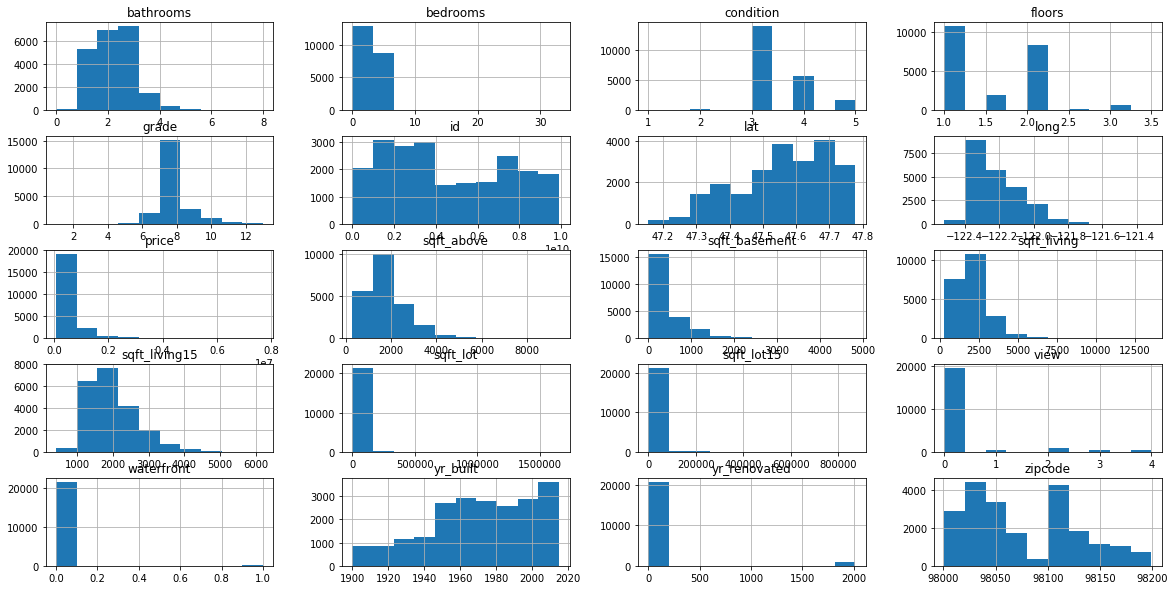

In [13]:
import pylab as pl
df.as_data_frame().hist(figsize=(20,10))
pl.show()


### Functions used:

In [26]:
#For the hyperparameter to be generated to the json file
def hyperparameter_json(hyperparameter,name):
    i = json.dumps(hyperparameter, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()

In [27]:
# Function to generate the run_id
def run_id(n):
    letter='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
    str=''
    r=len(letter)-1   
    while len(str)<n:
        i=random.randint(0,r)
        str+=letter[i]   
    return str
server_path=None

In [28]:
#Meta data sedcription
data_path=None
all_variables=None
test_path=None
target=None
nthreads=1 
min_mem_size=6 
run_time=200
regression=True
max_models=10   
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  

In [29]:
#Function for the meta data
def meta_data(run_id,server,data,test,model_path,target,run_time,regression,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
    m_data={}
    m_data['start_time'] = time.time()
    m_data['target']=target
    m_data['server_path']=server
    m_data['data_path']=data 
    m_data['test_path']=test
    m_data['max_models']=model
    m_data['run_time']=run_time
    m_data['run_id'] =run_id
   # m_data['scale']=scale
    m_data['regression']=regression
    m_data['scale']=False
    m_data['model_path']=model_path
    m_data['balance']=balance
    m_data['balance_threshold']=balance_threshold
    m_data['project'] =name
    m_data['end_time'] = time.time()
    m_data['execution_time'] = 0.0
    m_data['run_path'] =path
    m_data['nthreads'] = nthreads
    m_data['min_mem_size'] = min_mem_size
   # m_data['analysis'] = analysis
    return m_data

In [30]:
target='price' 

In [31]:
# assign target and inputs for linear regression
y = target
X = [name for name in df.columns if name != y]
print(y)
print(X)

price
['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


## Run time=200 seconds

In [32]:
project ="automl_run"
run_time=200

In [23]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # run auto ml for 200 seconds
aml.train(x=X,  
           y=y,
           training_frame=df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [24]:
runid=run_id(10)
if server_path==None:
    server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,runid)
os.mkdir(run_dir)
os.chdir(run_dir)    
print (runid)

51nAnG4w5Q


In [25]:
# view leaderboard
lb = aml.leaderboard
lb.head(500)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 DRF_1_AutoML_20190418_162739 2.72217e+10 164990 2.72217e+10 84171.5 0.201003

In [26]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
model_set

0    DRF_1_AutoML_20190418_162739
Name: model_id, dtype: object

In [27]:
# meta data
metadata = meta_data(runid,server_path,data_path,test_path,model_path,target,run_time,regression,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata)

{'start_time': 1555619476.7948704, 'target': 'price', 'server_path': 'C:\\Users\\Samartha\\Desktop\\ML_Project', 'data_path': None, 'test_path': None, 'max_models': 10, 'run_time': 200, 'run_id': '51nAnG4w5Q', 'regression': True, 'scale': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555619476.7948704, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Samartha\\Desktop\\ML_Project\\51nAnG4w5Q', 'nthreads': 1, 'min_mem_size': 6}


## DRF Model Hyperparameters for 200 seconds run time

In [28]:
mod_best0=h2o.get_model(model_set[0])
mod_best0.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190418_162739',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190418_162739'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment': {

In [29]:
hyperparameters = [mod_best0.params]
hyperparameter_json(hyperparameters,'DRF_200_seconds')

In [30]:
# view best model 
best = aml.leader
best 

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20190418_162739


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 27872136242.609898
RMSE: 166949.50207356084
MAE: 85377.82584340071
RMSLE: 0.2033982969628106
Mean Residual Deviance: 27872136242.609898

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 27221713920.388447
RMSE: 164990.04188249802
MAE: 84171.46984325841
RMSLE: 0.20100340382385917
Mean Residual Deviance: 27221713920.388447
Cross-Validation Metrics Summary: 


mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     84171.5      587.31       83871.9       83396.5       83742.9       84073.2       85773.2
mean_residual_deviance  2.72218e+10  1.32523e+09  2.70053e+10   2.53162e+10   2.72416e+10   2.58571e+10   3.0689e+10
mse                     2.72218e+10  1.32523e+09  2.70053e+10   2.53162e+10   2.72416e+10   2.58571e+10   3.0689e+10
r2                      0.798355     0.00580587   0.801895      0.796678      0.804883      0.805203      0.783116
residual_deviance       2.72218e+10  1.32523e+09  2.70053e+10   2.53162e+10   2.72416e+10   2.58571e+10   3.0689e+10
rmse                    164896       3954.65      164333        159111        165050        160801        175183
rmsle                   0.201        0.000856069  0.200578      0.199712      0.202706      0.199865      0.202138

Scoring History: 


timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2019-04-18 16:28:55  1 min 15.473 sec  0                  nan              nan             nan
    2019-04-18 16:28:55  1 min 15.880 sec  1                  247838           124804          6.14237e+10
    2019-04-18 16:28:55  1 min 16.208 sec  2                  241342           121163          5.82459e+10
    2019-04-18 16:28:56  1 min 16.520 sec  3                  227972           119047          5.19714e+10
    2019-04-18 16:28:56  1 min 16.826 sec  4                  219375           115308          4.81255e+10
    2019-04-18 16:28:56  1 min 17.106 sec  5                  212263           111056          4.50554e+10
    2019-04-18 16:28:57  1 min 17.402 sec  6                  204242           107479          4.17149e+10
    2019-04-18 16:28:57  1 min 17.709 sec  7                  200805           105478          4.03227e+10
    2019-04-18 16:28:57  1 min 17.971 sec  8                  200212           103600          4.00849e+10
    2019-04-18 16:28:57  1 min 18.267 sec  9                  196220           101550          3.85022e+10
    2019-04-18 16:28:58  1 min 18.548 sec  10                 192554           99570.9         3.70769e+10
    2019-04-18 16:28:58  1 min 18.845 sec  11                 190104           98113.8         3.61397e+10
    2019-04-18 16:28:58  1 min 19.327 sec  12                 188829           96846.6         3.56564e+10
    2019-04-18 16:29:03  1 min 23.374 sec  26                 174483           88550.1         3.04443e+10
    2019-04-18 16:29:07  1 min 27.446 sec  40                 169827           86335           2.88412e+10
    2019-04-18 16:29:09  1 min 30.328 sec  50                 166950           85377.8         2.78721e+10

Variable Importances: 


variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
sqft_living    2.38577e+16            1                    0.22644
grade          1.59429e+16            0.668247             0.151318
date           1.46602e+16            0.614486             0.139144
lat            1.14928e+16            0.48172              0.109081
sqft_living15  1.02937e+16            0.43146              0.0976996
sqft_above     7.18371e+15            0.301106             0.0681823
bathrooms      7.14565e+15            0.299511             0.0678211
long           3.43056e+15            0.143792             0.0325603
view           2.57017e+15            0.107729             0.0243941
yr_built       2.28453e+15            0.0957561            0.021683
waterfront     1.72267e+15            0.072206             0.0163503
sqft_basement  1.00839e+15            0.0422668            0.00957087
zipcode        9.55197e+14            0.0400372            0.009066
id             5.96144e+14            0.0249874            0.00565815
sqft_lot       5.05524e+14            0.0211891            0.00479806
sqft_lot15     4.7905e+14             0.0200794            0.00454678
bedrooms       4.19209e+14            0.0175712            0.00397882
condition      3.03256e+14            0.012711             0.00287827
floors         2.99989e+14            0.0125741            0.00284727
yr_renovated   2.0895e+14             0.00875815           0.00198319

In [31]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])#Getting the best model based on the leaderboard

In [32]:
best_model.algo

'drf'

## Runtime= 300 seconds

In [35]:
project ="automl_run"
run_time=300

In [34]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) #  run automl for 300 seconds
aml.train(x=X,  
           y=y,
           training_frame=df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [33]:
runid=run_id(10)
if server_path==None:
    server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,runid)
os.mkdir(run_dir)
os.chdir(run_dir)    
print (runid)

rPZR5jBEJs


In [36]:
# view leaderboard
lb = aml.leaderboard
lb.head(500)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 XRT_1_AutoML_20190418_163635 1.80789e+10 134458 1.80789e+10 73648.2 0.18402 
 DeepLearning_1_AutoML_20190418_163635 1.96934e+10 140333 1.96934e+10 83554.3 0.205896 
 GBM_1_AutoML_20190418_163635 2.40809e+10 155180 2.40809e+10 80867.7 0.193501 
 GBM_3_AutoML_20190418_163635 2.52646e+10 158948 2.52646e+10 81713.8 0.195259 
 GBM_5_AutoML_20190418_163635 2.5571e+10 159909 2.5571e+10 82901.6 0.198131 
 GBM_4_AutoML_20190418_163635 2.56959e+10 160299 2.56959e+10 82458.8 0.197186 
 GBM_2_AutoML_20190418_163635 2.59348e+10 161043 2.59348e+10 81610.9 0.194812 
 DRF_1_AutoML_20190418_162739 2.72217e+10 164990 2.72217e+10 84171.5 0.201003 
 DRF_1_AutoML_20190418_163635 2.76347e+10 166237 2.76347e+10 85623.7 0.204833 
 GBM_grid_1_AutoML_20190418_163635_model_1 1.28663e+11 358697 1.28663e+11 227769 0.533564 
 GLM_grid_1_AutoML_20190418_163635_model_1 1.34955e+11 367363 1.34955e+11 234075 0.548253

In [37]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
model_set

0                  XRT_1_AutoML_20190418_163635
1         DeepLearning_1_AutoML_20190418_163635
2                  GBM_1_AutoML_20190418_163635
3                  GBM_3_AutoML_20190418_163635
4                  GBM_5_AutoML_20190418_163635
5                  GBM_4_AutoML_20190418_163635
6                  GBM_2_AutoML_20190418_163635
7                  DRF_1_AutoML_20190418_162739
8                  DRF_1_AutoML_20190418_163635
9     GBM_grid_1_AutoML_20190418_163635_model_1
10    GLM_grid_1_AutoML_20190418_163635_model_1
Name: model_id, dtype: object

In [36]:
# meta data
metadata = meta_data(runid,server_path,data_path,test_path,model_path,target,run_time,regression,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata)

{'start_time': 1556039629.2040594, 'target': 'price', 'server_path': 'C:\\Users\\Samartha\\Desktop\\ML_Project', 'data_path': None, 'test_path': None, 'max_models': 10, 'run_time': 300, 'run_id': 'rPZR5jBEJs', 'regression': True, 'scale': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556039629.2040594, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Samartha\\Desktop\\ML_Project\\rPZR5jBEJs', 'nthreads': 1, 'min_mem_size': 6}


### DRF Models for 300 seconds run time

In [50]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best7=h2o.get_model(model_set[7])
mod_best8=h2o.get_model(model_set[8])# Model 0
mod_best7.params
mod_best8.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190418_163635',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190418_163635'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment': {

In [51]:
hyperparameters1 = [mod_best7.params]
hyperparameter_json(hyperparameters1,'DRF1_300_seconds')
hyperparameters2 = [mod_best8.params]
hyperparameter_json(hyperparameters2,'DRF2_300_seconds')

### GBM Best model parameters

In [52]:
# For Model 1
mod_best2=h2o.get_model(model_set[2])
mod_best3=h2o.get_model(model_set[3])
mod_best4=h2o.get_model(model_set[4])
mod_best5=h2o.get_model(model_set[5])
mod_best6=h2o.get_model(model_set[6])
mod_best2.params
mod_best3.params
mod_best4.params
mod_best5.params
mod_best6.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_2_AutoML_20190418_163635',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_2_AutoML_20190418_163635'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 'fold_assignment': {

In [53]:
hyperparameters3 = [mod_best2.params]
hyperparameter_json(hyperparameters3,'GBM1_300_seconds')
hyperparameters4 = [mod_best3.params]
hyperparameter_json(hyperparameters4,'GBM2_300_seconds')
hyperparameters5 = [mod_best4.params]
hyperparameter_json(hyperparameters5,'GBM3_300_seconds')
hyperparameters6 = [mod_best5.params]
hyperparameter_json(hyperparameters6,'GBM4_300_seconds')
hyperparameters7 = [mod_best6.params]
hyperparameter_json(hyperparameters7,'GBM5_300_seconds')

### GBM Grid Models

In [60]:
mod_best9=h2o.get_model(model_set[9])
mod_best9.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190418_163635_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190418_163635_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual':

In [63]:
hyperparameters8 = [mod_best9.params]
hyperparameter_json(hyperparameters8,'GBMGrid1_300_seconds')

### GLM Grid models

In [61]:
mod_best10=h2o.get_model(model_set[10])
mod_best10.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190418_163635_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190418_163635_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 6930908029746244205},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Mo

In [62]:
hyperparameters9 = [mod_best10.params]
hyperparameter_json(hyperparameters9,'GLMGrid2_300_seconds')

### XRT Model parameters

In [56]:
mod_best0=h2o.get_model(model_set[0])
mod_best0.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XRT_1_AutoML_20190418_163635',
   'type': 'Key<Model>',
   'URL': '/3/Models/XRT_1_AutoML_20190418_163635'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment': {

In [57]:
hyperparameters = [mod_best0.params]
hyperparameter_json(hyperparameters,'XRT_300_seconds')

### Deep Learning parameters

In [58]:
mod_best1=h2o.get_model(model_set[1])
mod_best1.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_1_AutoML_20190418_163635',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_1_AutoML_20190418_163635'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'},
 'fold_column': {'default': None, 'actual': None},
 'resp

In [59]:
hyperparameters = [mod_best1.params]
hyperparameter_json(hyperparameters,'DeepLearning_300_seconds')

In [64]:
best = aml.leader
best 

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_1_AutoML_20190418_163635


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 18464529387.201256
RMSE: 135884.24996003494
MAE: 75070.08676241853
RMSLE: 0.18710657231689395
Mean Residual Deviance: 18464529387.201256

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 18078896682.794228
RMSE: 134457.78773575826
MAE: 73648.23240601721
RMSLE: 0.18402027128834864
Mean Residual Deviance: 18078896682.794228
Cross-Validation Metrics Summary: 


mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     73648.2     275.283      74064.8       72911.1       73727.8       73821.2       73716.4
mean_residual_deviance  1.8079e+10  8.34235e+08  1.79359e+10   1.64513e+10   1.84291e+10   1.75327e+10   2.00458e+10
mse                     1.8079e+10  8.34235e+08  1.79359e+10   1.64513e+10   1.84291e+10   1.75327e+10   2.00458e+10
r2                      0.86611     0.00275328   0.868426      0.867875      0.868002      0.867916      0.858333
residual_deviance       1.8079e+10  8.34235e+08  1.79359e+10   1.64513e+10   1.84291e+10   1.75327e+10   2.00458e+10
rmse                    134387      3086.79      133925        128263        135754        132411        141583
rmsle                   0.184011    0.00127242   0.1839        0.182393      0.187427      0.183653      0.182684

Scoring History: 


timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2019-04-18 16:39:14  1 min 34.168 sec  0                  nan              nan             nan
    2019-04-18 16:39:14  1 min 34.599 sec  1                  196131           108577          3.84676e+10
    2019-04-18 16:39:15  1 min 35.032 sec  2                  192740           106140          3.71488e+10
    2019-04-18 16:39:15  1 min 35.425 sec  3                  191242           104166          3.65734e+10
    2019-04-18 16:39:15  1 min 35.806 sec  4                  186777           102466          3.48856e+10
    2019-04-18 16:39:16  1 min 36.245 sec  5                  178952           98482.7         3.20238e+10
    2019-04-18 16:39:16  1 min 36.686 sec  6                  176663           96156.7         3.12099e+10
    2019-04-18 16:39:17  1 min 37.094 sec  7                  170809           93394.3         2.91756e+10
    2019-04-18 16:39:17  1 min 37.521 sec  8                  166511           91510.2         2.77258e+10
    2019-04-18 16:39:17  1 min 37.881 sec  9                  162854           89897.9         2.65215e+10
    2019-04-18 16:39:21  1 min 41.884 sec  19                 147011           80936.4         2.16122e+10
    2019-04-18 16:39:26  1 min 46.029 sec  29                 140167           77909           1.96468e+10
    2019-04-18 16:39:30  1 min 50.048 sec  39                 137311           76246.6         1.88543e+10
    2019-04-18 16:39:34  1 min 54.441 sec  50                 135884           75070.1         1.84645e+10

Variable Importances: 


variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
sqft_living    2.63292e+16            1                    0.201066
date           2.3789e+16             0.90352              0.181667
grade          2.18406e+16            0.829518             0.166788
lat            1.24046e+16            0.471134             0.0947288
sqft_living15  9.86501e+15            0.374679             0.0753351
sqft_above     7.40056e+15            0.281078             0.0565151
bathrooms      6.7563e+15             0.256609             0.0515952
long           4.8803e+15             0.185357             0.0372689
view           3.63643e+15            0.138114             0.02777
yr_built       3.13713e+15            0.11915              0.023957
waterfront     2.63161e+15            0.0999504            0.0200966
zipcode        1.97633e+15            0.0750621            0.0150924
sqft_basement  1.78119e+15            0.0676508            0.0136023
id             1.04884e+15            0.0398358            0.00800961
sqft_lot       8.80768e+14            0.0334521            0.00672608
sqft_lot15     8.74805e+14            0.0332256            0.00668053
floors         5.2723e+14             0.0200245            0.00402625
condition      4.83493e+14            0.0183634            0.00369224
bedrooms       3.98037e+14            0.0151177            0.00303965
yr_renovated   3.06975e+14            0.0116591            0.00234425

In [65]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])#Getting the best model based on the leaderboard

In [66]:
best_model.algo# Name of the Algorithm for the best model

'drf'

## Runtime= 500 Seconds

In [67]:
project ="automl_run"
run_time=500

In [68]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 500 seconds
aml.train(x=X,  
           y=y,
           training_frame=df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [69]:
runid=run_id(10)
if server_path==None:
    server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,runid)
os.mkdir(run_dir)
os.chdir(run_dir)    
print (runid)

eDB7caa9PA


In [70]:
# view leaderboard
lb = aml.leaderboard
lb.head(500)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 XRT_1_AutoML_20190418_163635 1.80789e+10 134458 1.80789e+10 73648.2 0.18402 
 XRT_1_AutoML_20190418_165439 1.82967e+10 135265 1.82967e+10 73775.6 0.184968 
 DeepLearning_1_AutoML_20190418_163635 1.96934e+10 140333 1.96934e+10 83554.3 0.205896 
 DeepLearning_1_AutoML_20190418_165439 2.01152e+10 141828 2.01152e+10 83759.1 0.208654 
 GBM_grid_1_AutoML_20190418_165439_model_1 2.04256e+10 142918 2.04256e+10 76652.1 0.186732 
 GBM_1_AutoML_20190418_165439 2.36523e+10 153793 2.36523e+10 79508.1 0.19084 
 GBM_3_AutoML_20190418_165439 2.38267e+10 154359 2.38267e+10 80473.1 0.193682 
 GBM_1_AutoML_20190418_163635 2.40809e+10 155180 2.40809e+10 80867.7 0.193501 
 GBM_2_AutoML_20190418_165439 2.42393e+10 155690 2.42393e+10 80949.9 0.194184 
 GBM_4_AutoML_20190418_165439 2.51218e+10 158499 2.51218e+10 81809 0.195957 
 GBM_3_AutoML_20190418_163635 2.52646e+10 158948 2.52646e+10 81713.8 0.195259 
 GBM_5_AutoML_20190418_163635 2.5571e+10 159909 2.5571e+10 82901.6 0.198131 
 GBM_4_AutoML_20190418_163635 2.56959e+10 160299 2.56959e+10 82458.8 0.197186 
 GBM_2_AutoML_20190418_163635 2.59348e+10 161043 2.59348e+10 81610.9 0.194812 
 GBM_5_AutoML_20190418_165439 2.66729e+10 163319 2.66729e+10 83934.3 0.199548 
 DRF_1_AutoML_20190418_162739 2.72217e+10 164990 2.72217e+10 84171.5 0.201003 
 DRF_1_AutoML_20190418_165439 2.7533e+10 165931 2.7533e+10 84558.2 0.202067 
 DRF_1_AutoML_20190418_163635 2.76347e+10 166237 2.76347e+10 85623.7 0.204833 
 DeepLearning_grid_1_AutoML_20190418_165439_model_2 3.35421e+10 183145 3.35421e+10 107999 0.255146 
 DeepLearning_grid_1_AutoML_20190418_165439_model_3 3.6721e+10 191627 3.6721e+10 114920 0.274031 
 DeepLearning_grid_1_AutoML_20190418_165439_model_1 4.1064e+10 202643 4.1064e+10 116576 nan 
 GBM_grid_1_AutoML_20190418_165439_model_2 8.25032e+10 287234 8.25032e+10 176352 0.421342 
 GBM_grid_1_AutoML_20190418_163635_model_1 1.28663e+11 358697 1.28663e+11 227769 0.533564 
 GLM_grid_1_AutoML_20190418_163635_model_1 1.34955e+11 367363 1.34955e+11 234075 0.548253 
 GLM_grid_1_AutoML_20190418_165439_model_1 1.34955e+11 367363 1.34955e+11 234075 0.548253

In [71]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
model_set

0                          XRT_1_AutoML_20190418_163635
1                          XRT_1_AutoML_20190418_165439
2                 DeepLearning_1_AutoML_20190418_163635
3                 DeepLearning_1_AutoML_20190418_165439
4             GBM_grid_1_AutoML_20190418_165439_model_1
5                          GBM_1_AutoML_20190418_165439
6                          GBM_3_AutoML_20190418_165439
7                          GBM_1_AutoML_20190418_163635
8                          GBM_2_AutoML_20190418_165439
9                          GBM_4_AutoML_20190418_165439
10                         GBM_3_AutoML_20190418_163635
11                         GBM_5_AutoML_20190418_163635
12                         GBM_4_AutoML_20190418_163635
13                         GBM_2_AutoML_20190418_163635
14                         GBM_5_AutoML_20190418_165439
15                         DRF_1_AutoML_20190418_162739
16                         DRF_1_AutoML_20190418_165439
17                         DRF_1_AutoML_20190418

In [72]:
# meta data
metadata = meta_data(runid,server_path,data_path,test_path,model_path,target,run_time,regression,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata)

{'start_time': 1555621394.5276668, 'target': 'price', 'server_path': 'C:\\Users\\Samartha\\Desktop\\ML_Project', 'data_path': None, 'test_path': None, 'max_models': 10, 'run_time': 500, 'run_id': 'eDB7caa9PA', 'regression': True, 'scale': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555621394.5276668, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Samartha\\Desktop\\ML_Project\\eDB7caa9PA', 'nthreads': 1, 'min_mem_size': 6}


### XRT Models for 500 seconds run_time

In [73]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best0=h2o.get_model(model_set[0])
mod_best0.params
mod_best1=h2o.get_model(model_set[1])
mod_best1.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XRT_1_AutoML_20190418_165439',
   'type': 'Key<Model>',
   'URL': '/3/Models/XRT_1_AutoML_20190418_165439'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment': {

In [76]:
hyperparameters1 = [mod_best0.params]
hyperparameter_json(hyperparameters1,'XRT1_500_seconds')
hyperparameters2 = [mod_best1.params]
hyperparameter_json(hyperparameters2,'XRT2_500_seconds')

## GBM Models 500 seconds 2,3,5,7,8

In [79]:
mod_best5=h2o.get_model(model_set[5])
mod_best6=h2o.get_model(model_set[6])
mod_best7=h2o.get_model(model_set[7])
mod_best8=h2o.get_model(model_set[8])
mod_best9=h2o.get_model(model_set[9])
mod_best10=h2o.get_model(model_set[10])
mod_best11=h2o.get_model(model_set[11])
mod_best12=h2o.get_model(model_set[12])
mod_best13=h2o.get_model(model_set[13])
mod_best14=h2o.get_model(model_set[14])

In [80]:
mod_best5.params
mod_best6.params
mod_best7.params
mod_best8.params
mod_best9.params
mod_best10.params
mod_best11.params
mod_best12.params
mod_best13.params
mod_best14.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_5_AutoML_20190418_165439',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_5_AutoML_20190418_165439'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 'fold_assignment': {

In [81]:
hyperparameters = [mod_best5.params]
hyperparameter_json(hyperparameters,'GBM1_500_seconds')
hyperparameters = [mod_best6.params]
hyperparameter_json(hyperparameters,'GBM2_500_seconds')
hyperparameters = [mod_best7.params]
hyperparameter_json(hyperparameters,'GBM3_500_seconds')
hyperparameters = [mod_best8.params]
hyperparameter_json(hyperparameters,'GBM4_500_seconds')
hyperparameters = [mod_best9.params]
hyperparameter_json(hyperparameters,'GBM5_500_seconds')
hyperparameters = [mod_best10.params]
hyperparameter_json(hyperparameters,'GBM6_500_seconds')
hyperparameters = [mod_best11.params]
hyperparameter_json(hyperparameters,'GBM7_500_seconds')
hyperparameters = [mod_best12.params]
hyperparameter_json(hyperparameters,'GBM8_500_seconds')
hyperparameters = [mod_best13.params]
hyperparameter_json(hyperparameters,'GBM9_500_seconds')
hyperparameters = [mod_best14.params]
hyperparameter_json(hyperparameters,'GBM10_500_seconds')

## GBM_Gird 500 seconds

In [82]:
mod_best4=h2o.get_model(model_set[4])
mod_best21=h2o.get_model(model_set[21])
mod_best22=h2o.get_model(model_set[22])
mod_best4.params
mod_best21.params
mod_best22.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190418_163635_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190418_163635_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual':

In [83]:
hyperparameters = [mod_best4.params]
hyperparameter_json(hyperparameters,'GBM_Grid1_500_seconds')
hyperparameters = [mod_best21.params]
hyperparameter_json(hyperparameters,'GBM_Grid2_500_seconds')
hyperparameters = [mod_best22.params]
hyperparameter_json(hyperparameters,'GBM_Grid3_500_seconds')

## Deep Learning 500 seconds

In [84]:
mod_best2=h2o.get_model(model_set[2])
mod_best3=h2o.get_model(model_set[3])
mod_best18=h2o.get_model(model_set[18])
mod_best19=h2o.get_model(model_set[19])
mod_best20=h2o.get_model(model_set[20])
mod_best2.params
mod_best3.params
mod_best18.params
mod_best19.params
mod_best20.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_grid_1_AutoML_20190418_165439_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_grid_1_AutoML_20190418_165439_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'},
 'fold_column': {'default': Non

In [85]:
hyperparameters = [mod_best2.params]
hyperparameter_json(hyperparameters,'Deep_Learning1_500_seconds')
hyperparameters = [mod_best3.params]
hyperparameter_json(hyperparameters,'Deep_Learning2_500_seconds')
hyperparameters = [mod_best18.params]
hyperparameter_json(hyperparameters,'Deep_Learning3_500_seconds')
hyperparameters = [mod_best19.params]
hyperparameter_json(hyperparameters,'Deep_Learning4_500_seconds')
hyperparameters = [mod_best20.params]
hyperparameter_json(hyperparameters,'Deep_Learning5_500_seconds')

## DRF models 500 seconds

In [86]:
mod_best15=h2o.get_model(model_set[15])
mod_best16=h2o.get_model(model_set[16])
mod_best17=h2o.get_model(model_set[17])
mod_best15.params
mod_best16.params
mod_best17.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190418_163635',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190418_163635'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment': {

In [87]:
hyperparameters = [mod_best15.params]
hyperparameter_json(hyperparameters,'DRF1_500_seconds')
hyperparameters = [mod_best16.params]
hyperparameter_json(hyperparameters,'DRF2_500_seconds')
hyperparameters = [mod_best17.params]
hyperparameter_json(hyperparameters,'DRF3_500_seconds')

### GLM Grid

In [88]:
mod_best23=h2o.get_model(model_set[23])
mod_best24=h2o.get_model(model_set[24])
mod_best23.params
mod_best24.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190418_165439_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190418_165439_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 3890300789991204663},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Mo

In [89]:
hyperparameters = [mod_best23.params]
hyperparameter_json(hyperparameters,'GLMGrid1_500_seconds')
hyperparameters = [mod_best24.params]
hyperparameter_json(hyperparameters,'GLMGrid2_500_seconds')

In [90]:
# view best model 
best = aml.leader
best 

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_1_AutoML_20190418_163635


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 18464529387.201256
RMSE: 135884.24996003494
MAE: 75070.08676241853
RMSLE: 0.18710657231689395
Mean Residual Deviance: 18464529387.201256

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 18078896682.794228
RMSE: 134457.78773575826
MAE: 73648.23240601721
RMSLE: 0.18402027128834864
Mean Residual Deviance: 18078896682.794228
Cross-Validation Metrics Summary: 


mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     73648.2     275.283      74064.8       72911.1       73727.8       73821.2       73716.4
mean_residual_deviance  1.8079e+10  8.34235e+08  1.79359e+10   1.64513e+10   1.84291e+10   1.75327e+10   2.00458e+10
mse                     1.8079e+10  8.34235e+08  1.79359e+10   1.64513e+10   1.84291e+10   1.75327e+10   2.00458e+10
r2                      0.86611     0.00275328   0.868426      0.867875      0.868002      0.867916      0.858333
residual_deviance       1.8079e+10  8.34235e+08  1.79359e+10   1.64513e+10   1.84291e+10   1.75327e+10   2.00458e+10
rmse                    134387      3086.79      133925        128263        135754        132411        141583
rmsle                   0.184011    0.00127242   0.1839        0.182393      0.187427      0.183653      0.182684

Scoring History: 


timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2019-04-18 16:39:14  1 min 34.168 sec  0                  nan              nan             nan
    2019-04-18 16:39:14  1 min 34.599 sec  1                  196131           108577          3.84676e+10
    2019-04-18 16:39:15  1 min 35.032 sec  2                  192740           106140          3.71488e+10
    2019-04-18 16:39:15  1 min 35.425 sec  3                  191242           104166          3.65734e+10
    2019-04-18 16:39:15  1 min 35.806 sec  4                  186777           102466          3.48856e+10
    2019-04-18 16:39:16  1 min 36.245 sec  5                  178952           98482.7         3.20238e+10
    2019-04-18 16:39:16  1 min 36.686 sec  6                  176663           96156.7         3.12099e+10
    2019-04-18 16:39:17  1 min 37.094 sec  7                  170809           93394.3         2.91756e+10
    2019-04-18 16:39:17  1 min 37.521 sec  8                  166511           91510.2         2.77258e+10
    2019-04-18 16:39:17  1 min 37.881 sec  9                  162854           89897.9         2.65215e+10
    2019-04-18 16:39:21  1 min 41.884 sec  19                 147011           80936.4         2.16122e+10
    2019-04-18 16:39:26  1 min 46.029 sec  29                 140167           77909           1.96468e+10
    2019-04-18 16:39:30  1 min 50.048 sec  39                 137311           76246.6         1.88543e+10
    2019-04-18 16:39:34  1 min 54.441 sec  50                 135884           75070.1         1.84645e+10

Variable Importances: 


variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
sqft_living    2.63292e+16            1                    0.201066
date           2.3789e+16             0.90352              0.181667
grade          2.18406e+16            0.829518             0.166788
lat            1.24046e+16            0.471134             0.0947288
sqft_living15  9.86501e+15            0.374679             0.0753351
sqft_above     7.40056e+15            0.281078             0.0565151
bathrooms      6.7563e+15             0.256609             0.0515952
long           4.8803e+15             0.185357             0.0372689
view           3.63643e+15            0.138114             0.02777
yr_built       3.13713e+15            0.11915              0.023957
waterfront     2.63161e+15            0.0999504            0.0200966
zipcode        1.97633e+15            0.0750621            0.0150924
sqft_basement  1.78119e+15            0.0676508            0.0136023
id             1.04884e+15            0.0398358            0.00800961
sqft_lot       8.80768e+14            0.0334521            0.00672608
sqft_lot15     8.74805e+14            0.0332256            0.00668053
floors         5.2723e+14             0.0200245            0.00402625
condition      4.83493e+14            0.0183634            0.00369224
bedrooms       3.98037e+14            0.0151177            0.00303965
yr_renovated   3.06975e+14            0.0116591            0.00234425

In [91]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])#Getting the best model based on the leaderboard
best_model.algo

'drf'

## Runtime= 700 Seconds

In [92]:
project ="automl_run"
run_time=700

In [93]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 500 seconds
aml.train(x=X,  
           y=y,
           training_frame=df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [94]:
runid=run_id(10)
if server_path==None:
    server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,runid)
os.mkdir(run_dir)
os.chdir(run_dir)    
print (runid)

ZxQV4uELkm


In [95]:
# view leaderboard
lb = aml.leaderboard
lb.head(500)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 XRT_1_AutoML_20190418_172432 1.77665e+10 133291 1.77665e+10 73338.1 0.183892 
 XRT_1_AutoML_20190418_163635 1.80789e+10 134458 1.80789e+10 73648.2 0.18402 
 XRT_1_AutoML_20190418_165439 1.82967e+10 135265 1.82967e+10 73775.6 0.184968 
 DeepLearning_1_AutoML_20190418_163635 1.96934e+10 140333 1.96934e+10 83554.3 0.205896 
 DeepLearning_1_AutoML_20190418_172432 1.9909e+10 141099 1.9909e+10 84240.7 0.207068 
 GBM_grid_1_AutoML_20190418_172432_model_2 2.00594e+10 141631 2.00594e+10 75119.6 0.183657 
 DeepLearning_1_AutoML_20190418_165439 2.01152e+10 141828 2.01152e+10 83759.1 0.208654 
 DeepLearning_grid_1_AutoML_20190418_172432_model_1 2.04116e+10 142869 2.04116e+10 84767 nan 
 GBM_grid_1_AutoML_20190418_165439_model_1 2.04256e+10 142918 2.04256e+10 76652.1 0.186732 
 GBM_grid_1_AutoML_20190418_172432_model_4 2.2196e+10 148983 2.2196e+10 81623.4 0.197885 
 GBM_1_AutoML_20190418_165439 2.36523e+10 153793 2.36523e+10 79508.1 0.19084 
 GBM_3_AutoML_20190418_165439 2.38267e+10 154359 2.38267e+10 80473.1 0.193682 
 GBM_1_AutoML_20190418_163635 2.40809e+10 155180 2.40809e+10 80867.7 0.193501 
 GBM_2_AutoML_20190418_165439 2.42393e+10 155690 2.42393e+10 80949.9 0.194184 
 GBM_grid_1_AutoML_20190418_172432_model_5 2.43212e+10 155952 2.43212e+10 79447.7 0.191365 
 GBM_4_AutoML_20190418_172432 2.4839e+10 157604 2.4839e+10 81149.8 0.194848 
 GBM_4_AutoML_20190418_165439 2.51218e+10 158499 2.51218e+10 81809 0.195957 
 GBM_3_AutoML_20190418_172432 2.51781e+10 158676 2.51781e+10 81318.9 0.194075 
 GBM_3_AutoML_20190418_163635 2.52646e+10 158948 2.52646e+10 81713.8 0.195259 
 GBM_5_AutoML_20190418_163635 2.5571e+10 159909 2.5571e+10 82901.6 0.198131 
 GBM_4_AutoML_20190418_163635 2.56959e+10 160299 2.56959e+10 82458.8 0.197186 
 GBM_2_AutoML_20190418_163635 2.59348e+10 161043 2.59348e+10 81610.9 0.194812 
 GBM_1_AutoML_20190418_172432 2.61019e+10 161561 2.61019e+10 81566.4 0.194865 
 GBM_2_AutoML_20190418_172432 2.65787e+10 163030 2.65787e+10 82843.6 0.196858 
 GBM_5_AutoML_20190418_165439 2.66729e+10 163319 2.66729e+10 83934.3 0.199548 
 GBM_grid_1_AutoML_20190418_172432_model_1 2.68103e+10 163738 2.68103e+10 85728.9 0.206271 
 DRF_1_AutoML_20190418_172432 2.70662e+10 164518 2.70662e+10 84234.2 0.201846 
 GBM_5_AutoML_20190418_172432 2.71901e+10 164894 2.71901e+10 85295.9 0.201876 
 DRF_1_AutoML_20190418_162739 2.72217e+10 164990 2.72217e+10 84171.5 0.201003 
 DRF_1_AutoML_20190418_165439 2.7533e+10 165931 2.7533e+10 84558.2 0.202067 
 DRF_1_AutoML_20190418_163635 2.76347e+10 166237 2.76347e+10 85623.7 0.204833 
 GBM_grid_1_AutoML_20190418_172432_model_6 2.86161e+10 169163 2.86161e+10 85121.7 0.206282 
 DeepLearning_grid_1_AutoML_20190418_172432_model_2 3.09139e+10 175823 3.09139e+10 98121.4 nan 
 GBM_grid_1_AutoML_20190418_172432_model_3 3.10157e+10 176113 3.10157e+10 98674.5 0.235139 
 DeepLearning_grid_1_AutoML_20190418_165439_model_2 3.35421e+10 183145 3.35421e+10 107999 0.255146 
 DeepLearning_grid_1_AutoML_20190418_172432_model_3 3.60509e+10 189871 3.60509e+10 143276 0.387842 
 DeepLearning_grid_1_AutoML_20190418_165439_model_3 3.6721e+10 191627 3.6721e+10 114920 0.274031 
 DeepLearning_grid_1_AutoML_20190418_165439_model_1 4.1064e+10 202643 4.1064e+10 116576 nan 
 DeepLearning_grid_1_AutoML_20190418_172432_model_4 4.46426e+10 211288 4.46426e+10 126800 nan 
 GBM_grid_1_AutoML_20190418_165439_model_2 8.25032e+10 287234 8.25032e+10 176352 0.421342 
 GBM_grid_1_AutoML_20190418_163635_model_1 1.28663e+11 358697 1.28663e+11 227769 0.533564 
 GLM_grid_1_AutoML_20190418_163635_model_1 1.34955e+11 367363 1.34955e+11 234075 0.548253 
 GLM_grid_1_AutoML_20190418_165439_model_1 1.34955e+11 367363 1.34955e+11 234075 0.548253 
 GLM_grid_1_AutoML_20190418_172432_model_1 1.34955e+11 367363 1.34955e+11 234075 0.548253

In [96]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
model_set

0                          XRT_1_AutoML_20190418_172432
1                          XRT_1_AutoML_20190418_163635
2                          XRT_1_AutoML_20190418_165439
3                 DeepLearning_1_AutoML_20190418_163635
4                 DeepLearning_1_AutoML_20190418_172432
5             GBM_grid_1_AutoML_20190418_172432_model_2
6                 DeepLearning_1_AutoML_20190418_165439
7     DeepLearning_grid_1_AutoML_20190418_172432_mod...
8             GBM_grid_1_AutoML_20190418_165439_model_1
9             GBM_grid_1_AutoML_20190418_172432_model_4
10                         GBM_1_AutoML_20190418_165439
11                         GBM_3_AutoML_20190418_165439
12                         GBM_1_AutoML_20190418_163635
13                         GBM_2_AutoML_20190418_165439
14            GBM_grid_1_AutoML_20190418_172432_model_5
15                         GBM_4_AutoML_20190418_172432
16                         GBM_4_AutoML_20190418_165439
17                         GBM_3_AutoML_20190418

In [97]:
# meta data
metadata = meta_data(runid,server_path,data_path,test_path,model_path,target,run_time,regression,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata)

{'start_time': 1555623404.1676908, 'target': 'price', 'server_path': 'C:\\Users\\Samartha\\Desktop\\ML_Project', 'data_path': None, 'test_path': None, 'max_models': 10, 'run_time': 700, 'run_id': 'ZxQV4uELkm', 'regression': True, 'scale': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555623404.1676908, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Samartha\\Desktop\\ML_Project\\ZxQV4uELkm', 'nthreads': 1, 'min_mem_size': 6}


### XRT 700 Seconds

In [98]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best0=h2o.get_model(model_set[0])
mod_best0.params
mod_best1=h2o.get_model(model_set[1])
mod_best1.params
mod_best2=h2o.get_model(model_set[2])
mod_best2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XRT_1_AutoML_20190418_165439',
   'type': 'Key<Model>',
   'URL': '/3/Models/XRT_1_AutoML_20190418_165439'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment': {

In [99]:
hyperparameters = [mod_best0.params]
hyperparameter_json(hyperparameters,'XRT1_700_seconds')
hyperparameters = [mod_best1.params]
hyperparameter_json(hyperparameters,'XRT2_700_seconds')
hyperparameters = [mod_best2.params]
hyperparameter_json(hyperparameters,'XRT3_700_seconds')

### GBM 700 SECONDS


In [100]:
mod_best10=h2o.get_model(model_set[10])
mod_best11=h2o.get_model(model_set[11])
mod_best12=h2o.get_model(model_set[12])
mod_best13=h2o.get_model(model_set[13])
mod_best15=h2o.get_model(model_set[15])
mod_best16=h2o.get_model(model_set[16])
mod_best17=h2o.get_model(model_set[17])
mod_best18=h2o.get_model(model_set[18])
mod_best19=h2o.get_model(model_set[19])
mod_best20=h2o.get_model(model_set[20])
mod_best21=h2o.get_model(model_set[21])
mod_best22=h2o.get_model(model_set[22])
mod_best23=h2o.get_model(model_set[23])
mod_best24=h2o.get_model(model_set[24])
mod_best27=h2o.get_model(model_set[27])
mod_best39=h2o.get_model(model_set[39])
mod_best40=h2o.get_model(model_set[40])
mod_best10.params
mod_best11.params
mod_best12.params
mod_best13.params
mod_best15.params
mod_best16.params
mod_best17.params
mod_best18.params
mod_best19.params
mod_best20.params
mod_best21.params
mod_best22.params
mod_best23.params
mod_best24.params
mod_best27.params
mod_best39.params
mod_best40.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190418_163635_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190418_163635_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual':

In [105]:
hyperparameters = [mod_best10.params]
hyperparameter_json(hyperparameters,'GBM1_700_seconds')
hyperparameters = [mod_best11.params]
hyperparameter_json(hyperparameters,'GBM2_700_seconds')
hyperparameters = [mod_best12.params]
hyperparameter_json(hyperparameters,'GBM3_700_seconds')
hyperparameters = [mod_best13.params]
hyperparameter_json(hyperparameters,'GBM4_700_seconds')
hyperparameters = [mod_best15.params]
hyperparameter_json(hyperparameters,'GBM5_700_seconds')
hyperparameters = [mod_best16.params]
hyperparameter_json(hyperparameters,'GBM6_700_seconds')
hyperparameters = [mod_best17.params]
hyperparameter_json(hyperparameters,'GBM7_700_seconds')
hyperparameters = [mod_best18.params]
hyperparameter_json(hyperparameters,'GBM8_700_seconds')
hyperparameters = [mod_best19.params]
hyperparameter_json(hyperparameters,'GBM9_700_seconds')
hyperparameters = [mod_best20.params]
hyperparameter_json(hyperparameters,'GBM10_700_seconds')
hyperparameters = [mod_best21.params]
hyperparameter_json(hyperparameters,'GBM11_700_seconds')
hyperparameters = [mod_best22.params]
hyperparameter_json(hyperparameters,'GBM12_700_seconds')
hyperparameters = [mod_best23.params]
hyperparameter_json(hyperparameters,'GBM13_700_seconds')
hyperparameters = [mod_best24.params]
hyperparameter_json(hyperparameters,'GBM14_700_seconds')
hyperparameters = [mod_best27.params]
hyperparameter_json(hyperparameters,'GBM15_700_seconds')
hyperparameters = [mod_best39.params]
hyperparameter_json(hyperparameters,'GBM16_700_seconds')
hyperparameters = [mod_best40.params]
hyperparameter_json(hyperparameters,'GBM17_700_seconds')

### Deep Learning 700 seconds

In [106]:
mod_best3=h2o.get_model(model_set[3])
mod_best4=h2o.get_model(model_set[4])
mod_best3.params
mod_best4.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_1_AutoML_20190418_172432',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_1_AutoML_20190418_172432'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'},
 'fold_column': {'default': None, 'actual': None},
 'resp

In [107]:
hyperparameters = [mod_best3.params]
hyperparameter_json(hyperparameters,'Deep_Learning1_700_seconds')
hyperparameters = [mod_best4.params]
hyperparameter_json(hyperparameters,'Deep_Learning2_700_seconds')

### GBM_Grid 700 seconds

In [108]:
mod_best5=h2o.get_model(model_set[5])
mod_best8=h2o.get_model(model_set[8])
mod_best9=h2o.get_model(model_set[9])
mod_best14=h2o.get_model(model_set[14])
mod_best25=h2o.get_model(model_set[25])
mod_best31=h2o.get_model(model_set[31])
mod_best33=h2o.get_model(model_set[33])
mod_best39=h2o.get_model(model_set[39])
mod_best40=h2o.get_model(model_set[40])
mod_best5.params
mod_best8.params
mod_best9.params
mod_best14.params
mod_best25.params
mod_best31.params
mod_best33.params
mod_best39.params
mod_best40.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190418_163635_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190418_163635_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual':

In [109]:
hyperparameters = [mod_best5.params]
hyperparameter_json(hyperparameters,'GBM_Grid1_700_seconds')
hyperparameters = [mod_best8.params]
hyperparameter_json(hyperparameters,'GBM_Grid2_700_seconds')
hyperparameters = [mod_best9.params]
hyperparameter_json(hyperparameters,'GBM_Grid3_700_seconds')
hyperparameters = [mod_best14.params]
hyperparameter_json(hyperparameters,'GBM_Grid4_700_seconds')
hyperparameters = [mod_best25.params]
hyperparameter_json(hyperparameters,'GBM_Grid5_700_seconds')
hyperparameters = [mod_best31.params]
hyperparameter_json(hyperparameters,'GBM_Grid6_700_seconds')
hyperparameters = [mod_best33.params]
hyperparameter_json(hyperparameters,'GBM_Grid7_700_seconds')
hyperparameters = [mod_best39.params]
hyperparameter_json(hyperparameters,'GBM_Grid8_700_seconds')
hyperparameters = [mod_best40.params]
hyperparameter_json(hyperparameters,'GBM_Grid9_700_seconds')

### GLM Grid 700 seconds

In [110]:
mod_best41=h2o.get_model(model_set[41])
mod_best42=h2o.get_model(model_set[42])
mod_best43=h2o.get_model(model_set[43])
mod_best41.params
mod_best42.params
mod_best43.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190418_172432_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190418_172432_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -5580829733962190588},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'M

In [111]:
hyperparameters = [mod_best41.params]
hyperparameter_json(hyperparameters,'GLM_Grid1_700_seconds')
hyperparameters = [mod_best43.params]
hyperparameter_json(hyperparameters,'GLMGrid2_700_seconds')
hyperparameters = [mod_best43.params]
hyperparameter_json(hyperparameters,'GLMGrid3_700_seconds')

### DRF 700 Seconds

In [112]:
mod_best26=h2o.get_model(model_set[26])
mod_best28=h2o.get_model(model_set[28])
mod_best29=h2o.get_model(model_set[29])
mod_best30=h2o.get_model(model_set[30])
mod_best26.params
mod_best28.params
mod_best29.params
mod_best30.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190418_163635',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190418_163635'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment': {

In [113]:
hyperparameters = [mod_best26.params]
hyperparameter_json(hyperparameters,'DRF1_700_seconds')
hyperparameters = [mod_best28.params]
hyperparameter_json(hyperparameters,'DRF2_700_seconds')
hyperparameters = [mod_best29.params]
hyperparameter_json(hyperparameters,'DRF3_700_seconds')
hyperparameters = [mod_best30.params]
hyperparameter_json(hyperparameters,'DRF4_700_seconds')

### Deep Learning Grid 700 seconds

In [114]:
mod_best7=h2o.get_model(model_set[7])
mod_best32=h2o.get_model(model_set[32])
mod_best34=h2o.get_model(model_set[34])
mod_best35=h2o.get_model(model_set[35])
mod_best36=h2o.get_model(model_set[36])
mod_best37=h2o.get_model(model_set[37])
mod_best38=h2o.get_model(model_set[38])
mod_best7.params
mod_best32.params
mod_best34.params
mod_best35.params
mod_best36.params
mod_best37.params
mod_best38.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_grid_1_AutoML_20190418_172432_model_4',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_grid_1_AutoML_20190418_172432_model_4'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'},
 'fold_column': {'default': Non

In [115]:
hyperparameters = [mod_best7.params]
hyperparameter_json(hyperparameters,'DeepLearnigGrid1_700_seconds')
hyperparameters = [mod_best32.params]
hyperparameter_json(hyperparameters,'DeepLearningGrid2_700seconds')
hyperparameters = [mod_best34.params]
hyperparameter_json(hyperparameters,'DeepLearningGrid3_700_seconds')
hyperparameters = [mod_best35.params]
hyperparameter_json(hyperparameters,'DeepLearningGrid4_700_seconds')
hyperparameters = [mod_best36.params]
hyperparameter_json(hyperparameters,'DeepLearningGrid5_700_seconds')
hyperparameters = [mod_best37.params]
hyperparameter_json(hyperparameters,'DeepLearningGrid6_700_seconds')
hyperparameters = [mod_best38.params]
hyperparameter_json(hyperparameters,'DeepLearningGrid7_700_seconds')

In [116]:
# view best model 
best = aml.leader
best 


Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_1_AutoML_20190418_172432


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 18339399815.22552
RMSE: 135423.04019340847
MAE: 74648.27674611607
RMSLE: 0.18578029025832862
Mean Residual Deviance: 18339399815.22552

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 17766508040.600792
RMSE: 133291.0651191624
MAE: 73338.1082611666
RMSLE: 0.1838921298891065
Mean Residual Deviance: 17766508040.600792
Cross-Validation Metrics Summary: 


mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     73338.1      594.185     73890.2       72369.7       73668.3       72338.3       74424.1
mean_residual_deviance  1.77666e+10  9.7932e+08  1.81588e+10   1.60981e+10   1.78252e+10   1.66566e+10   2.00942e+10
mse                     1.77666e+10  9.7932e+08  1.81588e+10   1.60981e+10   1.78252e+10   1.66566e+10   2.00942e+10
r2                      0.868467     0.00411195  0.866791      0.870711      0.872328      0.874516      0.857991
residual_deviance       1.77666e+10  9.7932e+08  1.81588e+10   1.60981e+10   1.78252e+10   1.66566e+10   2.00942e+10
rmse                    133192       3643.9      134754        126878        133511        129061        141754
rmsle                   0.183877     0.0016772   0.184047      0.18201       0.188102      0.181278      0.183947

Scoring History: 


timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2019-04-18 17:27:12  1 min 32.221 sec  0                  nan              nan             nan
    2019-04-18 17:27:12  1 min 32.598 sec  1                  190106           108251          3.61404e+10
    2019-04-18 17:27:13  1 min 33.012 sec  2                  200126           109171          4.00506e+10
    2019-04-18 17:27:13  1 min 33.400 sec  3                  199081           107894          3.96332e+10
    2019-04-18 17:27:14  1 min 33.769 sec  4                  192872           105231          3.71996e+10
    2019-04-18 17:27:14  1 min 34.206 sec  5                  187875           102014          3.52969e+10
    2019-04-18 17:27:14  1 min 34.609 sec  6                  181867           98797.2         3.30755e+10
    2019-04-18 17:27:15  1 min 35.003 sec  7                  177907           96322.7         3.1651e+10
    2019-04-18 17:27:15  1 min 35.415 sec  8                  172856           94208.9         2.98793e+10
    2019-04-18 17:27:16  1 min 35.802 sec  9                  168471           91668.9         2.83825e+10
    2019-04-18 17:27:20  1 min 40.213 sec  18                 148259           82035.1         2.19808e+10
    2019-04-18 17:27:24  1 min 44.574 sec  27                 140635           78097.7         1.97783e+10
    2019-04-18 17:27:29  1 min 48.769 sec  37                 137466           76026.6         1.8897e+10
    2019-04-18 17:27:33  1 min 52.902 sec  47                 135365           74820.6         1.83237e+10
    2019-04-18 17:27:34  1 min 54.193 sec  50                 135423           74648.3         1.83394e+10

Variable Importances: 


variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
sqft_living    2.7366e+16             1                    0.209992
date           2.35028e+16            0.858833             0.180348
grade          2.10294e+16            0.768451             0.161368
sqft_living15  1.27819e+16            0.467072             0.0980814
lat            1.2614e+16             0.460937             0.0967929
sqft_above     7.04594e+15            0.257471             0.0540667
long           5.07582e+15            0.185479             0.0389491
bathrooms      4.44737e+15            0.162514             0.0341267
yr_built       2.93085e+15            0.107098             0.0224898
view           2.7336e+15             0.0998902            0.0209761
waterfront     2.43972e+15            0.0891514            0.0187211
zipcode        1.99596e+15            0.0729359            0.015316
sqft_basement  1.37986e+15            0.0504226            0.0105883
sqft_lot15     1.14358e+15            0.0417883            0.00877519
id             1.13409e+15            0.0414416            0.0087024
sqft_lot       8.79104e+14            0.032124             0.00674577
floors         5.42267e+14            0.0198154            0.00416106
bedrooms       5.02428e+14            0.0183596            0.00385536
condition      5.01404e+14            0.0183221            0.0038475
yr_renovated   2.73211e+14            0.00998358           0.00209647

In [117]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])#Getting the best model based on the leaderboard

In [118]:
best_model.algo

'drf'

## Runtime=1000 seconds

In [119]:
project ="automl_run"
run_time=1000

In [120]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # run automl for 1000 seconds
aml.train(x=X,  
           y=y,
           training_frame=df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [121]:
runid=run_id(10)
if server_path==None:
    server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,runid)
os.mkdir(run_dir)
os.chdir(run_dir)    
print (runid)

ioYIvK6n6B


In [122]:
# view leaderboard
lb = aml.leaderboard
lb.head(500)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 XRT_1_AutoML_20190418_172432 1.77665e+10 133291 1.77665e+10 73338.1 0.183892 
 XRT_1_AutoML_20190418_181012 1.80219e+10 134246 1.80219e+10 73233.2 0.183214 
 XRT_1_AutoML_20190418_163635 1.80789e+10 134458 1.80789e+10 73648.2 0.18402 
 XRT_1_AutoML_20190418_165439 1.82967e+10 135265 1.82967e+10 73775.6 0.184968 
 DeepLearning_1_AutoML_20190418_181012 1.89046e+10 137494 1.89046e+10 80720.4 0.20148 
 DeepLearning_grid_1_AutoML_20190418_181012_model_2 1.90806e+10 138133 1.90806e+10 77189.7 0.188493 
 DeepLearning_1_AutoML_20190418_163635 1.96934e+10 140333 1.96934e+10 83554.3 0.205896 
 DeepLearning_1_AutoML_20190418_172432 1.9909e+10 141099 1.9909e+10 84240.7 0.207068 
 GBM_grid_1_AutoML_20190418_172432_model_2 2.00594e+10 141631 2.00594e+10 75119.6 0.183657 
 DeepLearning_1_AutoML_20190418_165439 2.01152e+10 141828 2.01152e+10 83759.1 0.208654 
 DeepLearning_grid_1_AutoML_20190418_172432_model_1 2.04116e+10 142869 2.04116e+10 84767 nan 
 GBM_grid_1_AutoML_20190418_165439_model_1 2.04256e+10 142918 2.04256e+10 76652.1 0.186732 
 GBM_1_AutoML_20190418_181012 2.14993e+10 146626 2.14993e+10 78066.7 0.189221 
 GBM_grid_1_AutoML_20190418_172432_model_4 2.2196e+10 148983 2.2196e+10 81623.4 0.197885 
 GBM_1_AutoML_20190418_165439 2.36523e+10 153793 2.36523e+10 79508.1 0.19084 
 GBM_3_AutoML_20190418_165439 2.38267e+10 154359 2.38267e+10 80473.1 0.193682 
 GBM_1_AutoML_20190418_163635 2.40809e+10 155180 2.40809e+10 80867.7 0.193501 
 GBM_2_AutoML_20190418_165439 2.42393e+10 155690 2.42393e+10 80949.9 0.194184 
 GBM_grid_1_AutoML_20190418_172432_model_5 2.43212e+10 155952 2.43212e+10 79447.7 0.191365 
 GBM_3_AutoML_20190418_181012 2.4606e+10 156863 2.4606e+10 80759 0.193493 
 GBM_4_AutoML_20190418_172432 2.4839e+10 157604 2.4839e+10 81149.8 0.194848 
 GBM_2_AutoML_20190418_181012 2.5085e+10 158382 2.5085e+10 81290.1 0.194051 
 GBM_4_AutoML_20190418_165439 2.51218e+10 158499 2.51218e+10 81809 0.195957 
 GBM_3_AutoML_20190418_172432 2.51781e+10 158676 2.51781e+10 81318.9 0.194075 
 GBM_3_AutoML_20190418_163635 2.52646e+10 158948 2.52646e+10 81713.8 0.195259 
 GBM_4_AutoML_20190418_181012 2.54977e+10 159680 2.54977e+10 81917.1 0.195922 
 GBM_5_AutoML_20190418_163635 2.5571e+10 159909 2.5571e+10 82901.6 0.198131 
 GBM_4_AutoML_20190418_163635 2.56959e+10 160299 2.56959e+10 82458.8 0.197186 
 GBM_grid_1_AutoML_20190418_181012_model_3 2.5723e+10 160384 2.5723e+10 87530.9 0.210794 
 GBM_2_AutoML_20190418_163635 2.59348e+10 161043 2.59348e+10 81610.9 0.194812 
 GBM_1_AutoML_20190418_172432 2.61019e+10 161561 2.61019e+10 81566.4 0.194865 
 GBM_2_AutoML_20190418_172432 2.65787e+10 163030 2.65787e+10 82843.6 0.196858 
 GBM_5_AutoML_20190418_165439 2.66729e+10 163319 2.66729e+10 83934.3 0.199548 
 GBM_grid_1_AutoML_20190418_172432_model_1 2.68103e+10 163738 2.68103e+10 85728.9 0.206271 
 GBM_5_AutoML_20190418_181012 2.69085e+10 164038 2.69085e+10 84070.4 0.199673 
 DRF_1_AutoML_20190418_172432 2.70662e+10 164518 2.70662e+10 84234.2 0.201846 
 GBM_5_AutoML_20190418_172432 2.71901e+10 164894 2.71901e+10 85295.9 0.201876 
 DRF_1_AutoML_20190418_162739 2.72217e+10 164990 2.72217e+10 84171.5 0.201003 
 DRF_1_AutoML_20190418_165439 2.7533e+10 165931 2.7533e+10 84558.2 0.202067 
 DRF_1_AutoML_20190418_163635 2.76347e+10 166237 2.76347e+10 85623.7 0.204833 
 DRF_1_AutoML_20190418_181012 2.82781e+10 168161 2.82781e+10 85235.8 0.202683 
 GBM_grid_1_AutoML_20190418_172432_model_6 2.86161e+10 169163 2.86161e+10 85121.7 0.206282 
 DeepLearning_grid_1_AutoML_20190418_172432_model_2 3.09139e+10 175823 3.09139e+10 98121.4 nan 
 GBM_grid_1_AutoML_20190418_172432_model_3 3.10157e+10 176113 3.10157e+10 98674.5 0.235139 
 DeepLearning_grid_1_AutoML_20190418_165439_model_2 3.35421e+10 183145 3.35421e+10 107999 0.255146 
 DeepLearning_grid_1_AutoML_20190418_172432_model_3 3.60509e+10 189871 3.60509e+10 143276 0.387842 
 DeepLearning_grid_1_AutoML_20190418_181012_model_3 3.66063e+10 191328 3.66063e+10 117697 0.27115

In [123]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
model_set

0                          XRT_1_AutoML_20190418_172432
1                          XRT_1_AutoML_20190418_181012
2                          XRT_1_AutoML_20190418_163635
3                          XRT_1_AutoML_20190418_165439
4                 DeepLearning_1_AutoML_20190418_181012
5     DeepLearning_grid_1_AutoML_20190418_181012_mod...
6                 DeepLearning_1_AutoML_20190418_163635
7                 DeepLearning_1_AutoML_20190418_172432
8             GBM_grid_1_AutoML_20190418_172432_model_2
9                 DeepLearning_1_AutoML_20190418_165439
10    DeepLearning_grid_1_AutoML_20190418_172432_mod...
11            GBM_grid_1_AutoML_20190418_165439_model_1
12                         GBM_1_AutoML_20190418_181012
13            GBM_grid_1_AutoML_20190418_172432_model_4
14                         GBM_1_AutoML_20190418_165439
15                         GBM_3_AutoML_20190418_165439
16                         GBM_1_AutoML_20190418_163635
17                         GBM_2_AutoML_20190418

In [124]:
# meta data
metadata = meta_data(runid,server_path,data_path,test_path,model_path,target,run_time,regression,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata)

{'start_time': 1555626445.276726, 'target': 'price', 'server_path': 'C:\\Users\\Samartha\\Desktop\\ML_Project', 'data_path': None, 'test_path': None, 'max_models': 10, 'run_time': 1000, 'run_id': 'ioYIvK6n6B', 'regression': True, 'scale': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555626445.276726, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Samartha\\Desktop\\ML_Project\\ioYIvK6n6B', 'nthreads': 1, 'min_mem_size': 6}


### XRT algorithm 1000 Seconds

In [125]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best0=h2o.get_model(model_set[0])
mod_best0.params
mod_best1=h2o.get_model(model_set[1])
mod_best1.params
mod_best2=h2o.get_model(model_set[2])
mod_best2.params
mod_best3=h2o.get_model(model_set[3])
mod_best3.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XRT_1_AutoML_20190418_165439',
   'type': 'Key<Model>',
   'URL': '/3/Models/XRT_1_AutoML_20190418_165439'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment': {

In [126]:
hyperparameters = [mod_best0.params]
hyperparameter_json(hyperparameters,'XRT1_1000_seconds')
hyperparameters = [mod_best1.params]
hyperparameter_json(hyperparameters,'XRT2_1000_seconds')
hyperparameters = [mod_best2.params]
hyperparameter_json(hyperparameters,'XRT3_1000_seconds')
hyperparameters = [mod_best3.params]
hyperparameter_json(hyperparameters,'XRT4_1000_seconds')

### GBM 1000 Seconds

In [134]:
mod_best12=h2o.get_model(model_set[12])
mod_best14=h2o.get_model(model_set[14])
mod_best15=h2o.get_model(model_set[15])
mod_best16=h2o.get_model(model_set[16])
mod_best17=h2o.get_model(model_set[17])
mod_best19=h2o.get_model(model_set[19])
mod_best20=h2o.get_model(model_set[20])
mod_best21=h2o.get_model(model_set[21])
mod_best22=h2o.get_model(model_set[22])
mod_best23=h2o.get_model(model_set[23])
mod_best24=h2o.get_model(model_set[24])
mod_best25=h2o.get_model(model_set[25])
mod_best26=h2o.get_model(model_set[26])
mod_best27=h2o.get_model(model_set[27])
mod_best29=h2o.get_model(model_set[29])
mod_best30=h2o.get_model(model_set[30])
mod_best31=h2o.get_model(model_set[31])
mod_best32=h2o.get_model(model_set[32])
mod_best34=h2o.get_model(model_set[34])
mod_best36=h2o.get_model(model_set[36])
mod_best12.params
mod_best14.params
mod_best15.params
mod_best16.params
mod_best17.params
mod_best19.params
mod_best20.params
mod_best21.params
mod_best22.params
mod_best23.params
mod_best24.params
mod_best25.params
mod_best26.params
mod_best27.params
mod_best29.params
mod_best30.params
mod_best31.params
mod_best32.params
mod_best34.params
mod_best36.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_5_AutoML_20190418_172432',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_5_AutoML_20190418_172432'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 'fold_assignment': {

In [135]:
hyperparameters = [mod_best12.params]
hyperparameter_json(hyperparameters,'GBM1_1000_seconds')
hyperparameters = [mod_best14.params]
hyperparameter_json(hyperparameters,'GBM2_1000_seconds')
hyperparameters = [mod_best15.params]
hyperparameter_json(hyperparameters,'GBM3_1000_seconds')
hyperparameters = [mod_best16.params]
hyperparameter_json(hyperparameters,'GBM4_1000_seconds')
hyperparameters = [mod_best17.params]
hyperparameter_json(hyperparameters,'GBM5_1000_seconds')
hyperparameters = [mod_best19.params]
hyperparameter_json(hyperparameters,'GBM6_1000_seconds')
hyperparameters = [mod_best20.params]
hyperparameter_json(hyperparameters,'GBM7_1000_seconds')
hyperparameters = [mod_best21.params]
hyperparameter_json(hyperparameters,'GBM8_1000_seconds')
hyperparameters = [mod_best22.params]
hyperparameter_json(hyperparameters,'GBM9_1000_seconds')
hyperparameters = [mod_best23.params]
hyperparameter_json(hyperparameters,'GBM10_1000_seconds')
hyperparameters = [mod_best24.params]
hyperparameter_json(hyperparameters,'GBM11_1000_seconds')
hyperparameters = [mod_best25.params]
hyperparameter_json(hyperparameters,'GBM12_1000_seconds')
hyperparameters = [mod_best26.params]
hyperparameter_json(hyperparameters,'GBM13_1000_seconds')
hyperparameters = [mod_best27.params]
hyperparameter_json(hyperparameters,'GBM14_1000_seconds')
hyperparameters = [mod_best29.params]
hyperparameter_json(hyperparameters,'GBM15_1000_seconds')
hyperparameters = [mod_best30.params]
hyperparameter_json(hyperparameters,'GBM16_1000_seconds')
hyperparameters = [mod_best31.params]
hyperparameter_json(hyperparameters,'GBM17_1000_seconds')
hyperparameters = [mod_best32.params]
hyperparameter_json(hyperparameters,'GBM18_1000_seconds')
hyperparameters = [mod_best34.params]
hyperparameter_json(hyperparameters,'GBM19_1000_seconds')
hyperparameters = [mod_best36.params]
hyperparameter_json(hyperparameters,'GBM20_1000_seconds')

### GBM Grid 1000 Seconds

In [136]:
mod_best8=h2o.get_model(model_set[8])
mod_best11=h2o.get_model(model_set[11])
mod_best13=h2o.get_model(model_set[13])
mod_best18=h2o.get_model(model_set[18])
mod_best28=h2o.get_model(model_set[28])
mod_best33=h2o.get_model(model_set[33])
mod_best41=h2o.get_model(model_set[41])
mod_best43=h2o.get_model(model_set[43])
mod_best50=h2o.get_model(model_set[50])
mod_best52=h2o.get_model(model_set[52])
mod_best53=h2o.get_model(model_set[53])
mod_best54=h2o.get_model(model_set[54])
mod_best55=h2o.get_model(model_set[55])
mod_best8.params
mod_best11.params
mod_best13.params
mod_best18.params
mod_best28.params
mod_best33.params
mod_best41.params
mod_best43.params
mod_best50.params
mod_best52.params
mod_best53.params
mod_best54.params
mod_best55.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190418_163635_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190418_163635_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual':

In [137]:
hyperparameters = [mod_best8.params]
hyperparameter_json(hyperparameters,'GBM_Grid1_1000_seconds')
hyperparameters = [mod_best11.params]
hyperparameter_json(hyperparameters,'GBM_Grid2_1000_seconds')
hyperparameters = [mod_best13.params]
hyperparameter_json(hyperparameters,'GBM_Grid3_1000_seconds')
hyperparameters = [mod_best18.params]
hyperparameter_json(hyperparameters,'GBM_Grid4_1000_seconds')
hyperparameters = [mod_best28.params]
hyperparameter_json(hyperparameters,'GBM_Grid5_1000_seconds')
hyperparameters = [mod_best33.params]
hyperparameter_json(hyperparameters,'GBM_Grid6_1000_seconds')
hyperparameters = [mod_best41.params]
hyperparameter_json(hyperparameters,'GBM_Grid7_1000_seconds')
hyperparameters = [mod_best43.params]
hyperparameter_json(hyperparameters,'GBM_Grid8_1000_seconds')
hyperparameters = [mod_best50.params]
hyperparameter_json(hyperparameters,'GBM_Grid9_1000_seconds')
hyperparameters = [mod_best52.params]
hyperparameter_json(hyperparameters,'GBM_Grid10_1000_seconds')
hyperparameters = [mod_best53.params]
hyperparameter_json(hyperparameters,'GBM_Grid11_1000_seconds')
hyperparameters = [mod_best54.params]
hyperparameter_json(hyperparameters,'GBM_Grid12_1000_seconds')
hyperparameters = [mod_best55.params]
hyperparameter_json(hyperparameters,'GBM_Grid13_1000_seconds')

### Deep Learning Grid 1000 Seconds

In [139]:
mod_best5=h2o.get_model(model_set[5])
mod_best10=h2o.get_model(model_set[10])
mod_best42=h2o.get_model(model_set[42])
mod_best44=h2o.get_model(model_set[44])
mod_best45=h2o.get_model(model_set[45])
mod_best46=h2o.get_model(model_set[46])
mod_best47=h2o.get_model(model_set[47])
mod_best48=h2o.get_model(model_set[48])
mod_best49=h2o.get_model(model_set[49])
mod_best51=h2o.get_model(model_set[51])
mod_best5.params
mod_best10.params
mod_best42.params
mod_best44.params
mod_best45.params
mod_best46.params
mod_best47.params
mod_best48.params
mod_best49.params
mod_best51.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_grid_1_AutoML_20190418_172432_model_4',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_grid_1_AutoML_20190418_172432_model_4'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'},
 'fold_column': {'default': Non

In [140]:
hyperparameters = [mod_best5.params]
hyperparameter_json(hyperparameters,'DeepLearning_Grid1_1000_seconds')
hyperparameters = [mod_best10.params]
hyperparameter_json(hyperparameters,'DeepLearning_Grid2_1000_seconds')
hyperparameters = [mod_best42.params]
hyperparameter_json(hyperparameters,'DeepLearning_Grid3_1000_seconds')
hyperparameters = [mod_best44.params]
hyperparameter_json(hyperparameters,'DeepLearning_Grid4_1000_seconds')
hyperparameters = [mod_best45.params]
hyperparameter_json(hyperparameters,'DeepLearning_Grid5_1000_seconds')
hyperparameters = [mod_best46.params]
hyperparameter_json(hyperparameters,'DeepLearning_Grid6_1000_seconds')
hyperparameters = [mod_best47.params]
hyperparameter_json(hyperparameters,'DeepLearning_Grid7_1000_seconds')
hyperparameters = [mod_best48.params]
hyperparameter_json(hyperparameters,'DeepLearning_Grid8_1000_seconds')
hyperparameters = [mod_best49.params]
hyperparameter_json(hyperparameters,'DeepLearning_Grid9_1000_seconds')
hyperparameters = [mod_best51.params]
hyperparameter_json(hyperparameters,'DeepLearning_Grid10_1000_seconds')

## Deep Learning 1000 Seconds run

In [141]:
mod_best4=h2o.get_model(model_set[4])
mod_best4.params
mod_best6=h2o.get_model(model_set[6])
mod_best6.params
mod_best7=h2o.get_model(model_set[7])
mod_best7.params
mod_best9=h2o.get_model(model_set[9])
mod_best9.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_1_AutoML_20190418_165439',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_1_AutoML_20190418_165439'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'},
 'fold_column': {'default': None, 'actual': None},
 'resp

In [142]:
hyperparameters = [mod_best4.params]
hyperparameter_json(hyperparameters,'DeepLearning1_1000_seconds')
hyperparameters = [mod_best6.params]
hyperparameter_json(hyperparameters,'DeepLearning2_1000_seconds')
hyperparameters = [mod_best7.params]
hyperparameter_json(hyperparameters,'DeepLearning3_1000_seconds')
hyperparameters = [mod_best9.params]
hyperparameter_json(hyperparameters,'DeepLearning4_1000_seconds')

### DRF 1000 Seconds

In [143]:
mod_best35=h2o.get_model(model_set[35])
mod_best35.params
mod_best37=h2o.get_model(model_set[37])
mod_best37.params
mod_best38=h2o.get_model(model_set[38])
mod_best38.params
mod_best39=h2o.get_model(model_set[39])
mod_best39.params
mod_best40=h2o.get_model(model_set[40])
mod_best40.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190418_181012',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190418_181012'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment': {

In [144]:
hyperparameters = [mod_best35.params]
hyperparameter_json(hyperparameters,'DRF1_1000_seconds')
hyperparameters = [mod_best37.params]
hyperparameter_json(hyperparameters,'DRF2_1000_seconds')
hyperparameters = [mod_best38.params]
hyperparameter_json(hyperparameters,'DRF3_1000_seconds')
hyperparameters = [mod_best39.params]
hyperparameter_json(hyperparameters,'DRF4_1000_seconds')
hyperparameters = [mod_best40.params]
hyperparameter_json(hyperparameters,'DRF5_1000_seconds')

### GLM Grid 1000 seconds

In [145]:
mod_best56=h2o.get_model(model_set[56])
mod_best56.params
mod_best57=h2o.get_model(model_set[57])
mod_best57.params
mod_best58=h2o.get_model(model_set[58])
mod_best58.params
mod_best59=h2o.get_model(model_set[59])
mod_best59.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190418_181012_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190418_181012_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_kc_house_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_kc_house_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -7217250019157104928},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'M

In [146]:
hyperparameters = [mod_best56.params]
hyperparameter_json(hyperparameters,'GLMGrid1_1000_seconds')
hyperparameters = [mod_best57.params]
hyperparameter_json(hyperparameters,'GLMGrid2_1000_seconds')
hyperparameters = [mod_best58.params]
hyperparameter_json(hyperparameters,'GLMGrid3_1000_seconds')
hyperparameters = [mod_best59.params]
hyperparameter_json(hyperparameters,'GLMGrid4_1000_seconds')

In [147]:
# view best model 
best = aml.leader
best 

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_1_AutoML_20190418_172432


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 18339399815.22552
RMSE: 135423.04019340847
MAE: 74648.27674611607
RMSLE: 0.18578029025832862
Mean Residual Deviance: 18339399815.22552

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 17766508040.600792
RMSE: 133291.0651191624
MAE: 73338.1082611666
RMSLE: 0.1838921298891065
Mean Residual Deviance: 17766508040.600792
Cross-Validation Metrics Summary: 


mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     73338.1      594.185     73890.2       72369.7       73668.3       72338.3       74424.1
mean_residual_deviance  1.77666e+10  9.7932e+08  1.81588e+10   1.60981e+10   1.78252e+10   1.66566e+10   2.00942e+10
mse                     1.77666e+10  9.7932e+08  1.81588e+10   1.60981e+10   1.78252e+10   1.66566e+10   2.00942e+10
r2                      0.868467     0.00411195  0.866791      0.870711      0.872328      0.874516      0.857991
residual_deviance       1.77666e+10  9.7932e+08  1.81588e+10   1.60981e+10   1.78252e+10   1.66566e+10   2.00942e+10
rmse                    133192       3643.9      134754        126878        133511        129061        141754
rmsle                   0.183877     0.0016772   0.184047      0.18201       0.188102      0.181278      0.183947

Scoring History: 


timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2019-04-18 17:27:12  1 min 32.221 sec  0                  nan              nan             nan
    2019-04-18 17:27:12  1 min 32.598 sec  1                  190106           108251          3.61404e+10
    2019-04-18 17:27:13  1 min 33.012 sec  2                  200126           109171          4.00506e+10
    2019-04-18 17:27:13  1 min 33.400 sec  3                  199081           107894          3.96332e+10
    2019-04-18 17:27:14  1 min 33.769 sec  4                  192872           105231          3.71996e+10
    2019-04-18 17:27:14  1 min 34.206 sec  5                  187875           102014          3.52969e+10
    2019-04-18 17:27:14  1 min 34.609 sec  6                  181867           98797.2         3.30755e+10
    2019-04-18 17:27:15  1 min 35.003 sec  7                  177907           96322.7         3.1651e+10
    2019-04-18 17:27:15  1 min 35.415 sec  8                  172856           94208.9         2.98793e+10
    2019-04-18 17:27:16  1 min 35.802 sec  9                  168471           91668.9         2.83825e+10
    2019-04-18 17:27:20  1 min 40.213 sec  18                 148259           82035.1         2.19808e+10
    2019-04-18 17:27:24  1 min 44.574 sec  27                 140635           78097.7         1.97783e+10
    2019-04-18 17:27:29  1 min 48.769 sec  37                 137466           76026.6         1.8897e+10
    2019-04-18 17:27:33  1 min 52.902 sec  47                 135365           74820.6         1.83237e+10
    2019-04-18 17:27:34  1 min 54.193 sec  50                 135423           74648.3         1.83394e+10

Variable Importances: 


variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
sqft_living    2.7366e+16             1                    0.209992
date           2.35028e+16            0.858833             0.180348
grade          2.10294e+16            0.768451             0.161368
sqft_living15  1.27819e+16            0.467072             0.0980814
lat            1.2614e+16             0.460937             0.0967929
sqft_above     7.04594e+15            0.257471             0.0540667
long           5.07582e+15            0.185479             0.0389491
bathrooms      4.44737e+15            0.162514             0.0341267
yr_built       2.93085e+15            0.107098             0.0224898
view           2.7336e+15             0.0998902            0.0209761
waterfront     2.43972e+15            0.0891514            0.0187211
zipcode        1.99596e+15            0.0729359            0.015316
sqft_basement  1.37986e+15            0.0504226            0.0105883
sqft_lot15     1.14358e+15            0.0417883            0.00877519
id             1.13409e+15            0.0414416            0.0087024
sqft_lot       8.79104e+14            0.032124             0.00674577
floors         5.42267e+14            0.0198154            0.00416106
bedrooms       5.02428e+14            0.0183596            0.00385536
condition      5.01404e+14            0.0183221            0.0038475
yr_renovated   2.73211e+14            0.00998358           0.00209647

In [148]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])#Getting the best model based on the leaderboard

In [149]:
best_model.algo

'drf'

# Analysis to get the hyperparameters ranges for the algorithms generated

## GBM Algorithm

In [41]:
gbm_algo=pd.read_csv("GBM_Algo.csv", sep=',')

In [42]:
gbm_algo.head(100)

model_id  nfolds  max_after_balance_size  \
0                GBM_1_AutoML_20190418_163635       5                       5   
1                GBM_3_AutoML_20190418_163635       5                       5   
2                GBM_5_AutoML_20190418_163635       5                       5   
3                GBM_4_AutoML_20190418_163635       5                       5   
4                GBM_2_AutoML_20190418_163635       5                       5   
5   GBM_grid_1_AutoML_20190418_163635_model_1       5                       5   
6   GBM_grid_1_AutoML_20190418_165439_model_1       5                       5   
7   GBM_grid_1_AutoML_20190418_165439_model_2       5                       5   
8   GBM_grid_1_AutoML_20190418_163635_model_1       5                       5   
9                GBM_1_AutoML_20190418_165439       5                       5   
10               GBM_3_AutoML_20190418_165439       5                       5   
11               GBM_1_AutoML_20190418_163635       5                       5   
12               GBM_2_AutoML_20190418_165439       5                       5   
13               GBM_4_AutoML_20190418_165439       5                       5   
14               GBM_3_AutoML_20190418_163635       5                       5   
15               GBM_5_AutoML_20190418_163635       5                       5   
16               GBM_4_AutoML_20190418_163635       5                       5   
17               GBM_2_AutoML_20190418_163635       5                       5   
18               GBM_5_AutoML_20190418_165439       5                       5   
19  GBM_grid_1_AutoML_20190418_172432_model_2       5                       5   
20  GBM_grid_1_AutoML_20190418_165439_model_1       5                       5   
21  GBM_grid_1_AutoML_20190418_172432_model_4       5                       5   
22  GBM_grid_1_AutoML_20190418_172432_model_5       5                       5   
23  GBM_grid_1_AutoML_20190418_172432_model_1       5                       5   
24  GBM_grid_1_AutoML_20190418_172432_model_6       5                       5   
25  GBM_grid_1_AutoML_20190418_172432_model_3       5                       5   
26  GBM_grid_1_AutoML_20190418_165439_model_2       5                       5   
27  GBM_grid_1_AutoML_20190418_163635_model_1       5                       5   
28               GBM_1_AutoML_20190418_165439       5                       5   
29               GBM_3_AutoML_20190418_165439       5                       5   
..                                        ...     ...                     ...   
48  GBM_grid_1_AutoML_20190418_172432_model_5       5                       5   
49  GBM_grid_1_AutoML_20190418_181012_model_3       5                       5   
50  GBM_grid_1_AutoML_20190418_172432_model_1       5                       5   
51  GBM_grid_1_AutoML_20190418_172432_model_6       5                       5   
52  GBM_grid_1_AutoML_20190418_172432_model_3       5                       5   
53  GBM_grid_1_AutoML_20190418_181012_model_2       5                       5   
54  GBM_grid_1_AutoML_20190418_181012_model_1       5                       5   
55  GBM_grid_1_AutoML_20190418_165439_model_2       5                       5   
56  GBM_grid_1_AutoML_20190418_181012_model_4       5                       5   
57  GBM_grid_1_AutoML_20190418_163635_model_1       5                       5   
58               GBM_1_AutoML_20190418_181012       5                       5   
59               GBM_1_AutoML_20190418_165439       5                       5   
60               GBM_3_AutoML_20190418_165439       5                       5   
61               GBM_1_AutoML_20190418_163635       5                       5   
62               GBM_2_AutoML_20190418_165439       5                       5   
63               GBM_3_AutoML_20190418_181012       5                       5   
64               GBM_4_AutoML_20190418_172432       5                       5   
65               GBM_2_AutoML_20190418_181012       5               

In [43]:
gbm_algo.dtypes

model_id                      object
nfolds                         int64
max_after_balance_size         int64
max_confusion_matrix_size      int64
max_hit_ratio_k                int64
ntrees                         int64
max_depth                      int64
min_rows                       int64
nbins                          int64
nbins_top_level                int64
nbins_cats                     int64
stopping_rounds                int64
stopping_metric               object
stopping_tolerance           float64
seed                         float64
learn_rate                   float64
learn_rate_annealing           int64
distribution                  object
quantile_alpha               float64
tweedie_power                float64
huber_alpha                  float64
min_split_improvement        float64
histogram_type                object
pred_noise_bandwidth           int64
categorical_encoding          object
dtype: object

In [44]:
param_ranges = []
for key,val in gbm_algo.dtypes.items():
    print(key,val)
    if val == 'int64': 
         param_ranges.append([key,[gbm_algo[key].min(),gbm_algo[key].max()]])
    if val == 'float64':
         param_ranges.append([key,[gbm_algo[key].min(),gbm_algo[key].max()]])

model_id object
nfolds int64
max_after_balance_size int64
max_confusion_matrix_size int64
max_hit_ratio_k int64
ntrees int64
max_depth int64
min_rows int64
nbins int64
nbins_top_level int64
nbins_cats int64
stopping_rounds int64
stopping_metric object
stopping_tolerance float64
seed float64
learn_rate float64
learn_rate_annealing int64
distribution object
quantile_alpha float64
tweedie_power float64
huber_alpha float64
min_split_improvement float64
histogram_type object
pred_noise_bandwidth int64
categorical_encoding object


In [45]:
param_ranges

[['nfolds', [5, 5]],
 ['max_after_balance_size', [5, 5]],
 ['max_confusion_matrix_size', [20, 20]],
 ['max_hit_ratio_k', [0, 0]],
 ['ntrees', [4, 1376]],
 ['max_depth', [3, 17]],
 ['min_rows', [5, 100]],
 ['nbins', [20, 20]],
 ['nbins_top_level', [1024, 1024]],
 ['nbins_cats', [1024, 1024]],
 ['stopping_rounds', [0, 0]],
 ['stopping_tolerance', [0.006802091999999999, 0.006802091999999999]],
 ['seed', [-8.3e+18, 8.8e+18]],
 ['learn_rate', [0.001, 0.5]],
 ['learn_rate_annealing', [1, 1]],
 ['quantile_alpha', [0.5, 0.5]],
 ['tweedie_power', [1.5, 1.5]],
 ['huber_alpha', [0.9, 0.9]],
 ['min_split_improvement', [1e-05, 0.0001]],
 ['pred_noise_bandwidth', [0, 0]]]

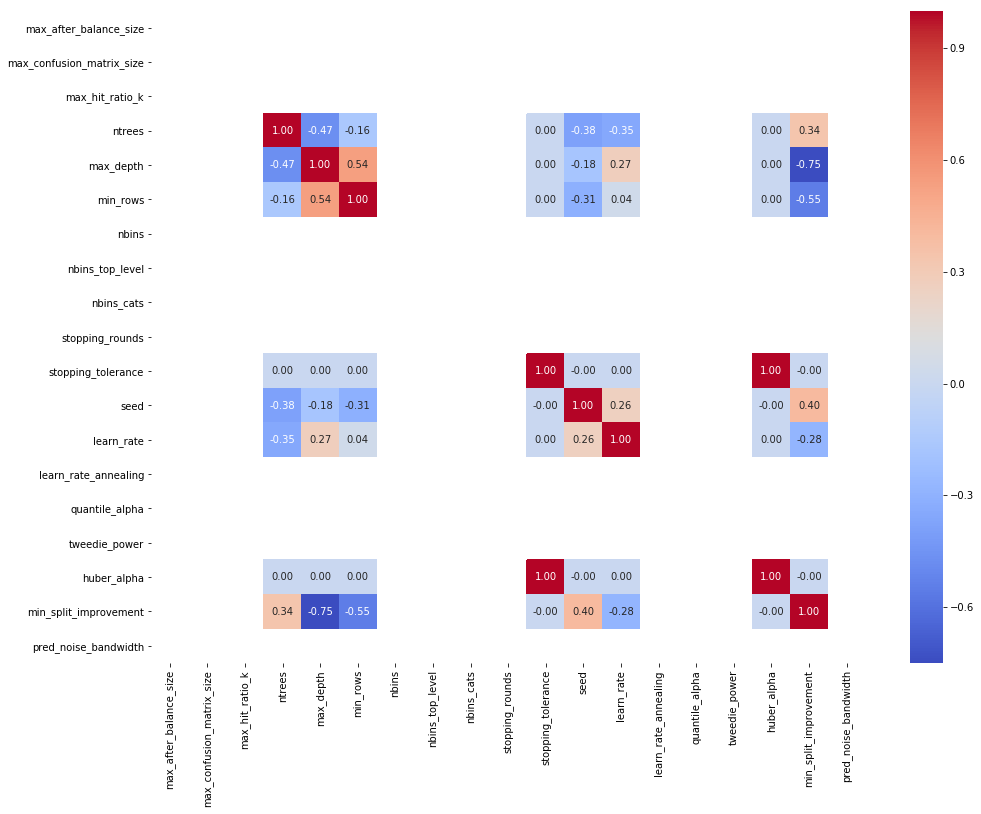

In [47]:
plt.figure(figsize=(16,12))
sns.heatmap(data=gbm_algo.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### From this we can see that the highly significant and correlated hyperparameters are:stopping_tolerance, huber_alhpa,lear_rate,max_depth and min_split_improvement

## Deep learning Algorithm

In [48]:
deep_learning=pd.read_csv("Deep_Learning.csv", sep=',')

In [49]:
deep_learning.head(100)deep_learning.head(100)

model_id  nfolds fold_assignment  \
0               DeepLearning_1_AutoML_20190418_163635       5          modulo   
1               DeepLearning_1_AutoML_20190418_163635       5          modulo   
2               DeepLearning_1_AutoML_20190418_165439       5          modulo   
3   DeepLearning_grid_1_AutoML_20190418_165439_mod...       5          modulo   
4   DeepLearning_grid_1_AutoML_20190418_165439_mod...       5          modulo   
5   DeepLearning_grid_1_AutoML_20190418_165439_mod...       5          modulo   
6   DeepLearning_grid_1_AutoML_20190418_181012_mod...       5          modulo   
7   DeepLearning_grid_1_AutoML_20190418_172432_mod...       5          modulo   
8   DeepLearning_grid_1_AutoML_20190418_172432_mod...       5          modulo   
9   DeepLearning_grid_1_AutoML_20190418_165439_mod...       5          modulo   
10  DeepLearning_grid_1_AutoML_20190418_172432_mod...       5          modulo   
11  DeepLearning_grid_1_AutoML_20190418_181012_mod...       5          modulo   
12  DeepLearning_grid_1_AutoML_20190418_165439_mod...       5          modulo   
13  DeepLearning_grid_1_AutoML_20190418_181012_mod...       5          modulo   
14  DeepLearning_grid_1_AutoML_20190418_165439_mod...       5          modulo   
15  DeepLearning_grid_1_AutoML_20190418_172432_mod...       5          modulo   
16              DeepLearning_1_AutoML_20190418_181012       5          modulo   
17              DeepLearning_1_AutoML_20190418_163635       5          modulo   
18              DeepLearning_1_AutoML_20190418_172432       5          modulo   
19              DeepLearning_1_AutoML_20190418_165439       5          modulo   
20              DeepLearning_1_AutoML_20190418_163635       5          modulo   
21              DeepLearning_1_AutoML_20190418_172432       5          modulo   
22  DeepLearning_grid_1_AutoML_20190418_172432_mod...       5          modulo   
23  DeepLearning_grid_1_AutoML_20190418_172432_mod...       5          modulo   
24  DeepLearning_grid_1_AutoML_20190418_165439_mod...       5          modulo   
25  DeepLearning_grid_1_AutoML_20190418_172432_mod...       5          modulo   
26  DeepLearning_grid_1_AutoML_20190418_165439_mod...       5          modulo   
27  DeepLearning_grid_1_AutoML_20190418_165439_mod...       5          modulo   
28  DeepLearning_grid_1_AutoML_20190418_172432_mod...       5          modulo   

    max_after_balance_size  max_confusion_matrix_size  max_hit_ratio_k  \
0                        5                         20                0   
1                        5                         20                0   
2                        5                         20                0   
3                        5                         20                0   
4                        5                         20                0   
5                        5                         20                0   
6                        5                         20                0   
7                        5                         20                0   
8                        5                         20                0   
9                        5                         20                0   
10                       5                         20                0   
11                       5                         20                0   
12                       5                         20                0   
13                       5                         20                0   
14                       5                         20                0   
15                       5                         20                0   
16                       5                         20                0   
17                       5                         20                0   
18                       5                         20                0   
19                       5                         20                0   
20                       5                         20       

In [50]:
deep_learning.dtypes

model_id                             object
nfolds                                int64
fold_assignment                      object
max_after_balance_size                int64
max_confusion_matrix_size             int64
max_hit_ratio_k                       int64
standardize                            bool
activation                           object
epochs                              float64
train_samples_per_iteration           int64
seed                                float64
rho                                 float64
epsilon                             float64
rate                                float64
rate_annealing                      float64
rate_decay                            int64
momentum_start                        int64
momentum_ramp                         int64
l1                                    int64
l2                                    int64
max_w2                              float64
initial_weight_distribution          object
initial_weight_scale            

In [51]:
param_ranges = []
for key,val in deep_learning.dtypes.items():
    print(key,val)
    if val == 'int64': 
         param_ranges.append([key,[deep_learning[key].min(),deep_learning[key].max()]])
    if val == 'float64':
         param_ranges.append([key,[deep_learning[key].min(),deep_learning[key].max()]])

model_id object
nfolds int64
fold_assignment object
max_after_balance_size int64
max_confusion_matrix_size int64
max_hit_ratio_k int64
standardize bool
activation object
epochs float64
train_samples_per_iteration int64
seed float64
rho float64
epsilon float64
rate float64
rate_annealing float64
rate_decay int64
momentum_start int64
momentum_ramp int64
l1 int64
l2 int64
max_w2 float64
initial_weight_distribution object
initial_weight_scale int64
loss object
quantile_alpha float64
tweedie_power float64
score_interval int64
huber_alpha float64
score_training_samples int64
score_validation_samples int64
score_duty_cycle float64
stopping_rounds int64
stopping_metric object
stopping_tolerance float64
max_runtime_secs int64
score_validation_sampling object
diagnostics bool
fast_mode bool
force_load_balance bool
variable_importances bool
single_node_mode bool
quiet_mode bool
autoencoder bool
sparse bool
col_major bool
average_activation int64
sparsity_beta int64
reproducible object
export_weig

In [52]:
param_ranges

[['nfolds', [5, 5]],
 ['max_after_balance_size', [5, 5]],
 ['max_confusion_matrix_size', [20, 20]],
 ['max_hit_ratio_k', [0, 0]],
 ['epochs', [0.23547161, 17.61201577]],
 ['train_samples_per_iteration', [-2, -2]],
 ['seed', [-7.09e+18, 9e+18]],
 ['rho', [0.9, 0.99]],
 ['epsilon', [1e-09, 1e-06]],
 ['rate', [0.005, 0.005]],
 ['rate_annealing', [1e-06, 1e-06]],
 ['rate_decay', [1, 1]],
 ['momentum_start', [0, 0]],
 ['momentum_ramp', [1000000, 1000000]],
 ['l1', [0, 0]],
 ['l2', [0, 0]],
 ['max_w2', [3.4000000000000003e+38, 3.4000000000000003e+38]],
 ['initial_weight_scale', [1, 1]],
 ['quantile_alpha', [0.5, 0.5]],
 ['tweedie_power', [1.5, 1.5]],
 ['score_interval', [5, 5]],
 ['huber_alpha', [0.9, 0.9]],
 ['score_training_samples', [10000, 10000]],
 ['score_validation_samples', [0, 0]],
 ['score_duty_cycle', [0.1, 0.1]],
 ['stopping_rounds', [0, 0]],
 ['stopping_tolerance', [0.006802091999999999, 0.006802091999999999]],
 ['max_runtime_secs', [0, 0]],
 ['average_activation', [0, 0]],
 ['s

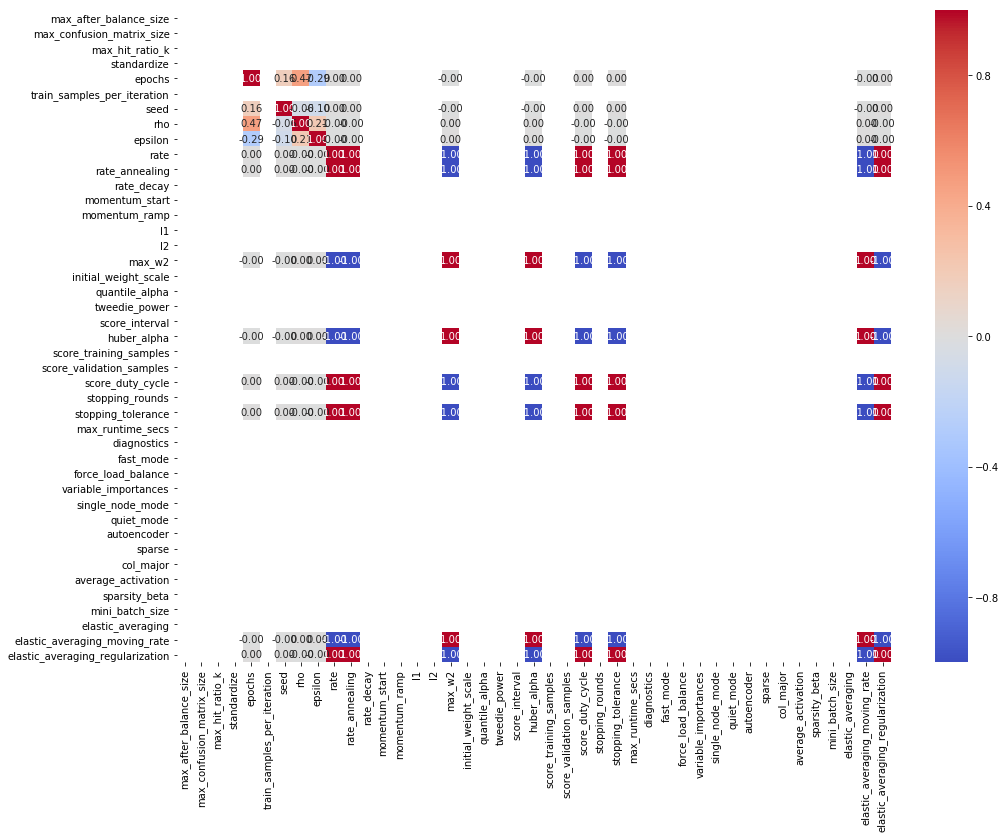

In [53]:
plt.figure(figsize=(16,12))
sns.heatmap(data=deep_learning.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### From this we see that the most significant and important hyperparameters are: stopping tolerance,huber_alpha, max_w2,elastic_averaging_regularization

## DRF Algorithm

In [54]:
drf=pd.read_csv("DRF_Algo.csv", sep=',')

In [55]:
drf.head(100)

model_id  nfolds  score_tree_interval fold_assignment  \
0   DRF_1_AutoML_20190418_162739       5                    0          modulo   
1   DRF_1_AutoML_20190418_162739       5                    0          modulo   
2   DRF_1_AutoML_20190418_163635       5                    0          modulo   
3   DRF_1_AutoML_20190418_163862       5                    0          modulo   
4   DRF_1_AutoML_20190418_165439       5                    0          modulo   
5   DRF_1_AutoML_20190418_163635       5                    0          modulo   
6   DRF_1_AutoML_20190418_172432       5                    0          modulo   
7   DRF_1_AutoML_20190418_162739       5                    0          modulo   
8   DRF_1_AutoML_20190418_165439       5                    0          modulo   
9   DRF_1_AutoML_20190418_163635       5                    0          modulo   
10  DRF_1_AutoML_20190418_172432       5                    0          modulo   
11  DRF_1_AutoML_20190418_162739       5                    0          modulo   
12  DRF_1_AutoML_20190418_165439       5                    0          modulo   
13  DRF_1_AutoML_20190418_163635       5                    0          modulo   
14  DRF_1_AutoML_20190418_181012       5                    0          modulo   

    balance_classes  max_after_balance_size  max_hit_ratio_k  ntrees  \
0             False                       5                0      50   
1             False                       5                0      50   
2             False                       5                0      34   
3             False                       5                0      50   
4             False                       5                0      42   
5             False                       5                0      34   
6             False                       5                0      41   
7             False                       5                0      50   
8             False                       5                0      42   
9             False                       5                0      34   
10            False                       5                0      41   
11            False                       5                0      50   
12            False                       5                0      42   
13            False                       5                0      34   
14            False                       5                0      42   

    max_depth  min_rows  nbins  nbins_top_level  nbins_cats  stopping_rounds  \
0          20         1     20             1024        1024                0   
1          20         1     20             1024        1024                0   
2          20         1     20             1024        1024                0   
3          20         1     20             1024        1024                0   
4          20         1     20             1024        1024                0   
5          20         1     20             1024        1024                0   
6          20         1     20             1024        1024                0   
7          20         1     20             1024        1024                0   
8          20         1     20             1024        1024                0   
9          20         1     20             1024        1024                0   
10         20         1     20             1024        1024                0   
11         20         1     20             1024        1024                0   
12         20         1     20             1024        1024                0   
13         20         1     20             1024        1024                0   
14         20         1     20             1024        1024                0   

   stopping_metric  stopping_tolerance          seed  mtries  sample_rate  \
0             AUTO            0.006802  1.040000e+18      -1        0.632   
1             AUTO            0.006802  1.040000e+18      -1        0.632   
2             AUTO            0.006802 -8.830000e+18      -1  

In [56]:
drf.dtypes

model_id                   object
nfolds                      int64
score_tree_interval         int64
fold_assignment            object
balance_classes              bool
max_after_balance_size      int64
max_hit_ratio_k             int64
ntrees                      int64
max_depth                   int64
min_rows                    int64
nbins                       int64
nbins_top_level             int64
nbins_cats                  int64
stopping_rounds             int64
stopping_metric            object
stopping_tolerance        float64
seed                      float64
mtries                      int64
sample_rate               float64
min_split_improvement     float64
histogram_type             object
categorical_encoding       object
distribution               object
dtype: object

In [57]:
param_ranges = []
for key,val in drf.dtypes.items():
    print(key,val)
    if val == 'int64': 
         param_ranges.append([key,[drf[key].min(),drf[key].max()]])
    if val == 'float64':
         param_ranges.append([key,[drf[key].min(),drf[key].max()]])

model_id object
nfolds int64
score_tree_interval int64
fold_assignment object
balance_classes bool
max_after_balance_size int64
max_hit_ratio_k int64
ntrees int64
max_depth int64
min_rows int64
nbins int64
nbins_top_level int64
nbins_cats int64
stopping_rounds int64
stopping_metric object
stopping_tolerance float64
seed float64
mtries int64
sample_rate float64
min_split_improvement float64
histogram_type object
categorical_encoding object
distribution object


In [58]:
param_ranges

[['nfolds', [5, 5]],
 ['score_tree_interval', [0, 0]],
 ['max_after_balance_size', [5, 5]],
 ['max_hit_ratio_k', [0, 0]],
 ['ntrees', [34, 50]],
 ['max_depth', [20, 20]],
 ['min_rows', [1, 1]],
 ['nbins', [20, 20]],
 ['nbins_top_level', [1024, 1024]],
 ['nbins_cats', [1024, 1024]],
 ['stopping_rounds', [0, 0]],
 ['stopping_tolerance', [0.006802091999999999, 0.006802091999999999]],
 ['seed', [-8.83e+18, 1.96e+18]],
 ['mtries', [-1, -1]],
 ['sample_rate', [0.632000029, 0.632000029]],
 ['min_split_improvement', [1e-05, 1e-05]]]

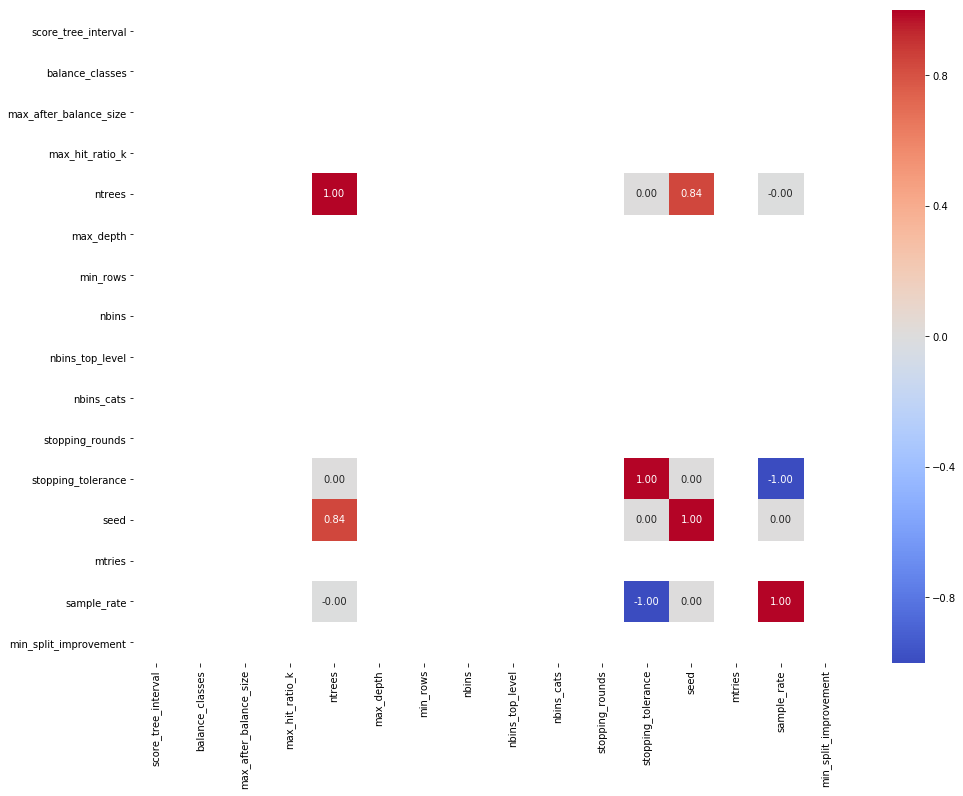

In [59]:
plt.figure(figsize=(16,12))
sns.heatmap(data=drf.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### From this we see that the most significant hyperparameters are the stopping_tolerance, ntrees, sample_rate,seed

## GLM Algorithm

In [60]:
glm_grid=pd.read_csv("GLM_Algo.csv", sep=',')

In [61]:
glm_grid.head(100)

model_id  nfolds          seed  \
0  GLM_grid_1_AutoML_20190418_163635_model_1       5  6.930000e+18   
1  GLM_grid_1_AutoML_20190418_163635_model_1       5  6.930000e+18   
2  GLM_grid_1_AutoML_20190418_165439_model_1       5  3.890000e+18   
3  GLM_grid_1_AutoML_20190418_163635_model_1       5  6.930000e+18   
4  GLM_grid_1_AutoML_20190418_172432_model_1       5 -5.580000e+18   
5  GLM_grid_1_AutoML_20190418_172432_model_1       5 -5.580000e+18   
6  GLM_grid_1_AutoML_20190418_163635_model_1       5  6.930000e+18   
7  GLM_grid_1_AutoML_20190418_172432_model_1       5 -5.580000e+18   
8  GLM_grid_1_AutoML_20190418_165439_model_1       5  3.890000e+18   
9  GLM_grid_1_AutoML_20190418_181012_model_1       5 -7.220000e+18   

  fold_assignment  tweedie_variance_power  tweedie_link_power  \
0          Modulo                       0                   1   
1          Modulo                       0                   1   
2          Modulo                       0                   1   
3          Modulo                       0                   1   
4          Modulo                       0                   1   
5          Modulo                       0                   1   
6          Modulo                       0                   1   
7          Modulo                       0                   1   
8          Modulo                       0                   1   
9          Modulo                       0                   1   

               solver  alpha_1  alpha_2  alpha_3  alpha_4  alpha_5  alpha_6  \
0  COORDINATE_DESCENT        0      0.2      0.4      0.6      0.8        1   
1  COORDINATE_DESCENT        0      0.2      0.4      0.6      0.8        1   
2  COORDINATE_DESCENT        0      0.2      0.4      0.6      0.8        1   
3  COORDINATE_DESCENT        0      0.2      0.4      0.6      0.8        1   
4  COORDINATE_DESCENT        0      0.2      0.4      0.6      0.8        1   
5  COORDINATE_DESCENT        0      0.2      0.4      0.6      0.8        1   
6  COORDINATE_DESCENT        0      0.2      0.4      0.6      0.8        1   
7  COORDINATE_DESCENT        0      0.2      0.4      0.6      0.8        1   
8  COORDINATE_DESCENT        0      0.2      0.4      0.6      0.8        1   
9  COORDINATE_DESCENT        0      0.2      0.4      0.6      0.8        1   

      lambda_1     lambda_2     lambda_3     lambda_4     lambda_5  \
0  25789241.54  16015555.91  9945931.555  6176591.999  3835768.274   
1  25789241.54  16015555.91  9945931.555  6176591.999  3835768.274   
2  25789241.54  16015555.91  9945931.555  6176591.999  3835768.274   
3  25789241.54  16015555.91  9945931.555  6176591.999  3835768.274   
4  25789241.54  16015555.91  9945931.555  6176591.999  3835768.274   
5  25789241.54  16015555.91  9945931.555  6176591.999  3835768.274   
6  25789241.54  16015555.91  9945931.555  6176591.999  3835768.274   
7  25789241.54  16015555.91  9945931.555  6176591.999  3835768.274   
8  25789241.54  16015555.91  9945931.555  6176591.999  3835768.274   
9  25789241.54  16015555.91  9945931.555  6176591.999  3835768.274   

   lambda_search  early_stopping  nlambdas  standardize  \
0           True            True        30         True   
1           True            True        30         True   
2           True            True        30         True   
3           True            True        30         True   
4           True            True        30         True   
5           True            True        30         True   
6           True            True        30         True   
7           True            True        30         True   
8           True            True        30         True   
9           True            True        30         True   

  missing_values_handling  max_iterations  objective_epsilon  beta_epsilon  \
0          MeanImputation             NaN             0.0001        0.0001   
1          MeanImputation             NaN             0.0001        0.0001   
2          MeanImputatio

In [62]:
glm_grid.dtypes

model_id                      object
nfolds                         int64
seed                         float64
fold_assignment               object
tweedie_variance_power         int64
tweedie_link_power             int64
solver                        object
alpha_1                        int64
alpha_2                      float64
alpha_3                      float64
alpha_4                      float64
alpha_5                      float64
alpha_6                        int64
lambda_1                     float64
lambda_2                     float64
lambda_3                     float64
lambda_4                     float64
lambda_5                     float64
lambda_search                   bool
early_stopping                  bool
nlambdas                       int64
standardize                     bool
missing_values_handling       object
max_iterations               float64
objective_epsilon            float64
beta_epsilon                 float64
gradient_epsilon             float64
l

In [63]:
param_ranges = []
for key,val in glm_grid.dtypes.items():
    print(key,val)
    if val == 'int64': 
         param_ranges.append([key,[glm_grid[key].min(),glm_grid[key].max()]])
    if val == 'float64':
         param_ranges.append([key,[glm_grid[key].min(),glm_grid[key].max()]])

model_id object
nfolds int64
seed float64
fold_assignment object
tweedie_variance_power int64
tweedie_link_power int64
solver object
alpha_1 int64
alpha_2 float64
alpha_3 float64
alpha_4 float64
alpha_5 float64
alpha_6 int64
lambda_1 float64
lambda_2 float64
lambda_3 float64
lambda_4 float64
lambda_5 float64
lambda_search bool
early_stopping bool
nlambdas int64
standardize bool
missing_values_handling object
max_iterations float64
objective_epsilon float64
beta_epsilon float64
gradient_epsilon float64
link object
lambda_min_ratio float64
interactions float64
max_after_balance_size int64
max_confusion_matrix_size int64
max_hit_ratio_k int64


In [64]:
param_ranges

[['nfolds', [5, 5]],
 ['seed', [-7.22e+18, 6.93e+18]],
 ['tweedie_variance_power', [0, 0]],
 ['tweedie_link_power', [1, 1]],
 ['alpha_1', [0, 0]],
 ['alpha_2', [0.2, 0.2]],
 ['alpha_3', [0.4, 0.4]],
 ['alpha_4', [0.6, 0.6]],
 ['alpha_5', [0.8, 0.8]],
 ['alpha_6', [1, 1]],
 ['lambda_1', [25789241.54, 25789241.54]],
 ['lambda_2', [16015555.91, 16015555.91]],
 ['lambda_3', [9945931.555, 9945931.555]],
 ['lambda_4', [6176591.999, 6176591.999]],
 ['lambda_5', [3835768.2739999997, 3835768.2739999997]],
 ['nlambdas', [30, 30]],
 ['max_iterations', [nan, nan]],
 ['objective_epsilon', [0.0001, 0.0001]],
 ['beta_epsilon', [0.0001, 0.0001]],
 ['gradient_epsilon', [1e-06, 1e-06]],
 ['lambda_min_ratio', [1e-06, 1e-06]],
 ['interactions', [nan, nan]],
 ['max_after_balance_size', [5, 5]],
 ['max_confusion_matrix_size', [20, 20]],
 ['max_hit_ratio_k', [0, 0]]]

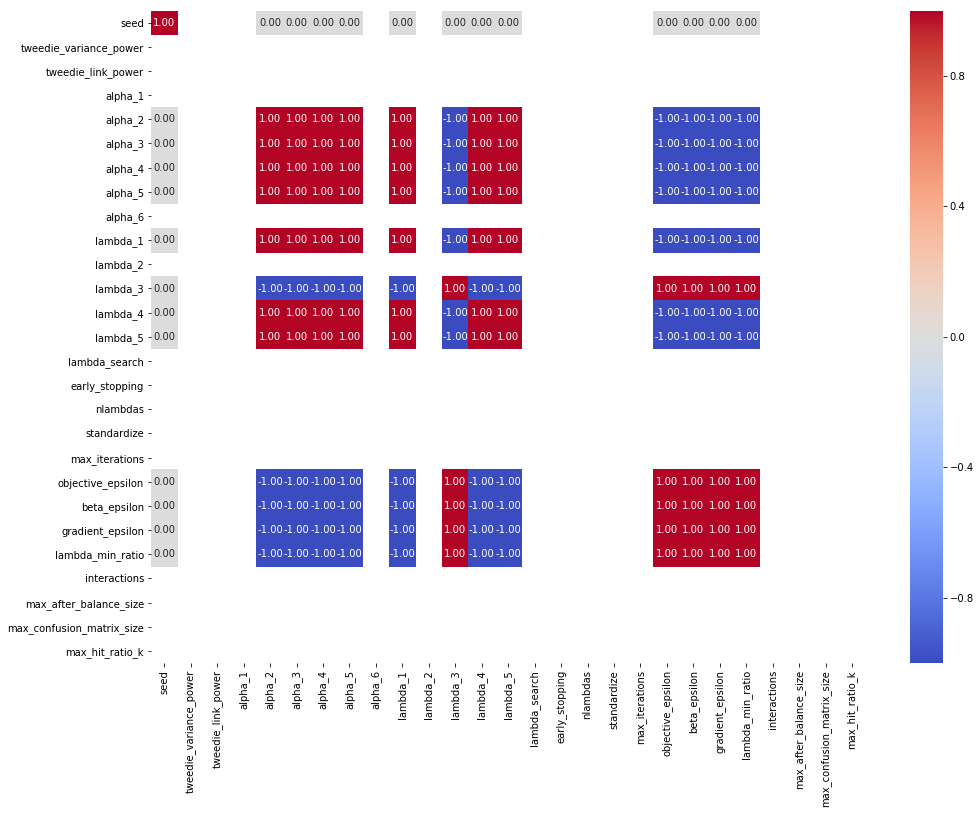

In [65]:
plt.figure(figsize=(16,12))
sns.heatmap(data=glm_grid.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### From this we see that the most significant hyperparameters are alpha, lambda, epsilon

## XRT Algorithm

In [66]:
xrt=pd.read_csv("XRT_Algo.csv", sep=',')

In [67]:
xrt.head(100)

model_id  nfolds  score_each_iteration  \
0  XRT_1_AutoML_20190418_163635       5                 False   
1  XRT_1_AutoML_20190418_163635       5                 False   
2  XRT_1_AutoML_20190418_165439       5                 False   
3  XRT_1_AutoML_20190418_172432       5                 False   
4  XRT_1_AutoML_20190418_163635       5                 False   
5  XRT_1_AutoML_20190418_165439       5                 False   
6  XRT_1_AutoML_20190418_172432       5                 False   
7  XRT_1_AutoML_20190418_181012       5                 False   
8  XRT_1_AutoML_20190418_163635       5                 False   
9  XRT_1_AutoML_20190418_165439       5                 False   

   score_tree_interval fold_assignment  balance_classes  \
0                    0          modulo            False   
1                    0          modulo            False   
2                    0          modulo            False   
3                    0          modulo            False   
4                    0          modulo            False   
5                    0          modulo            False   
6                    0          modulo            False   
7                    0          modulo            False   
8                    0          modulo            False   
9                    0          modulo            False   

   max_after_balance_size  max_confusion_matrix_size  max_hit_ratio_k  ntrees  \
0                       5                         20                0      50   
1                       5                         20                0      50   
2                       5                         20                0      50   
3                       5                         20                0      50   
4                       5                         20                0      50   
5                       5                         20                0      50   
6                       5                         20                0      50   
7                       5                         20                0      50   
8                       5                         20                0      50   
9                       5                         20                0      50   

   max_depth  min_rows  nbins  nbins_top_level  nbins_cats  stopping_rounds  \
0         20         1     20             1024        1024                0   
1         20         1     20             1024        1024                0   
2         20         1     20             1024        1024                0   
3         20         1     20             1024        1024                0   
4         20         1     20             1024        1024                0   
5         20         1     20             1024        1024                0   
6         20         1     20             1024        1024                0   
7         20         1     20             1024        1024                0   
8         20         1     20             1024        1024                0   
9         20         1     20             1024        1024                0   

  stopping_metric  stopping_tolerance          seed  sample_rate  \
0        deviance            0.006802  7.510000e+18        0.632   
1        deviance            0.006802  7.510000e+18        0.632   
2        deviance            0.006802 -6.100000e+18        0.632   
3        deviance            0.006802 -5.900000e+18        0.632   
4        deviance            0.006802  7.510000e+18        0.632   
5        deviance            0.006802 -6.100000e+18        0.632   
6        deviance            0.006802 -5.900000e+18        0.632   
7        deviance            0.006802  9.390000e+17        0.632   
8        deviance            0.006802  7.510000e+18        0.632   
9        deviance            0.006802 -6.100000e+18        0.632   

  histogram_type categorical_encoding distribution  
0         Random                 AUTO     gaussian  
1         Random                 AUTO   

In [68]:
xrt.dtypes

model_id                      object
nfolds                         int64
score_each_iteration            bool
score_tree_interval            int64
fold_assignment               object
balance_classes                 bool
max_after_balance_size         int64
max_confusion_matrix_size      int64
max_hit_ratio_k                int64
ntrees                         int64
max_depth                      int64
min_rows                       int64
nbins                          int64
nbins_top_level                int64
nbins_cats                     int64
stopping_rounds                int64
stopping_metric               object
stopping_tolerance           float64
seed                         float64
sample_rate                  float64
histogram_type                object
categorical_encoding          object
distribution                  object
dtype: object

In [69]:
param_ranges = []
for key,val in xrt.dtypes.items():
    print(key,val)
    if val == 'int64': 
         param_ranges.append([key,[xrt[key].min(),xrt[key].max()]])
    if val == 'float64':
         param_ranges.append([key,[xrt[key].min(),xrt[key].max()]])

model_id object
nfolds int64
score_each_iteration bool
score_tree_interval int64
fold_assignment object
balance_classes bool
max_after_balance_size int64
max_confusion_matrix_size int64
max_hit_ratio_k int64
ntrees int64
max_depth int64
min_rows int64
nbins int64
nbins_top_level int64
nbins_cats int64
stopping_rounds int64
stopping_metric object
stopping_tolerance float64
seed float64
sample_rate float64
histogram_type object
categorical_encoding object
distribution object


In [70]:
param_ranges

[['nfolds', [5, 5]],
 ['score_tree_interval', [0, 0]],
 ['max_after_balance_size', [5, 5]],
 ['max_confusion_matrix_size', [20, 20]],
 ['max_hit_ratio_k', [0, 0]],
 ['ntrees', [50, 50]],
 ['max_depth', [20, 20]],
 ['min_rows', [1, 1]],
 ['nbins', [20, 20]],
 ['nbins_top_level', [1024, 1024]],
 ['nbins_cats', [1024, 1024]],
 ['stopping_rounds', [0, 0]],
 ['stopping_tolerance', [0.006802091999999999, 0.006802091999999999]],
 ['seed', [-6.1e+18, 7.51e+18]],
 ['sample_rate', [0.632000029, 0.632000029]]]

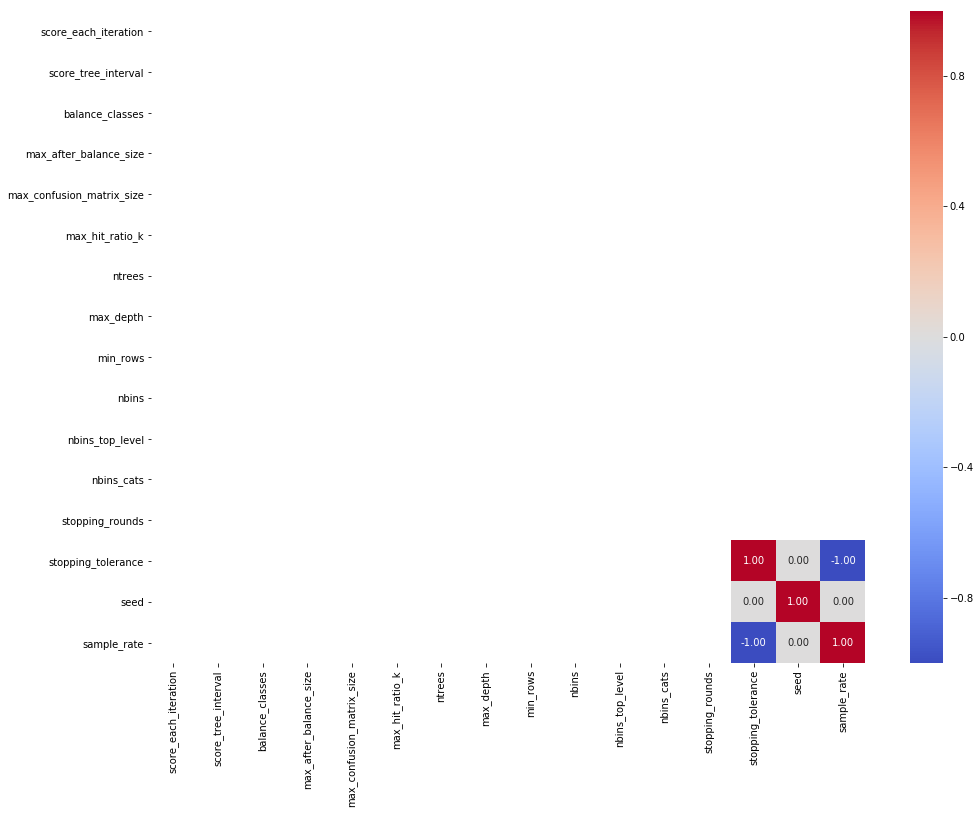

In [71]:
plt.figure(figsize=(16,12))
sns.heatmap(data=xrt.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### From this we can note that the most significant hyperparameters are stopping_tolerance, sample_rate

## Grid Search for Important hyperparameter search

### Performed for GBM algorithm as it has generated the maximum models for the different run times

In [6]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch


In [7]:
x = df.columns
y = "price"
x.remove(y)

In [8]:
split = df.split_frame(seed = 1)
train = split[0]
valid = split[1]


In [9]:
gbm_params = {'max_after_balance_size': [5, 5],
 'max_depth': [3, 17],
 'min_rows': [5, 100],
 'nbins': [20, 20],
 'nbins_top_level': [1024, 1024],
 'stopping_tolerance': [0.006802091999999999, 0.006802091999999999],
 'learn_rate': [0.001, 0.5],
 'quantile_alpha': [0.5, 0.5],
 'tweedie_power': [1.5, 1.5],
 'huber_alpha': [0.9, 0.9]}

In [10]:
gbm_search = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_search',
                          hyper_params=gbm_params)

In [11]:
gbm_search.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=50,
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [12]:
gbm_best = gbm_search.get_grid(sort_by='mse', decreasing=True)
gbm_best

    huber_alpha learn_rate max_after_balance_size max_depth min_rows nbins  \
0           0.9      0.001                    5.0         3      5.0    20   
1           0.9      0.001                    5.0         3    100.0    20   
2           0.9      0.001                    5.0        17    100.0    20   
3           0.9      0.001                    5.0        17      5.0    20   
4           0.9        0.5                    5.0        17    100.0    20   
5           0.9        0.5                    5.0        17      5.0    20   
6           0.9        0.5                    5.0         3    100.0    20   
7           0.9        0.5                    5.0         3      5.0    20   

  nbins_top_level quantile_alpha    stopping_tolerance tweedie_power  \
0            1024            0.5  0.006802091999999999           1.5   
1            1024            0.5  0.006802091999999999           1.5   
2            1024            0.5  0.006802091999999999           1.5   
3        

In [13]:
best_gbm = gbm_best.models[0]

In [14]:
best_gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid1_model_1


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 131518220513.78586
RMSE: 362654.409202185
MAE: 228266.5932373902
RMSLE: 0.5324001563500397
Mean Residual Deviance: 131518220513.78586

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 113040498038.83223
RMSE: 336214.95808311715
MAE: 221771.2506198951
RMSLE: 0.5265318150093473
Mean Residual Deviance: 113040498038.83223
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2019-04-26 02:35:33  0.132 sec   0.0                373979.7727210193   236202.15805136474  139860870404.46524   346381.6457528475   229646.45579059309  119980244514.45114
     2019-04-26 02:35:34  1.003 sec   1.0                373748.93017642555  236033.4006996068   139688262808.0226    346169.3109414559   229479.412593491    119833191837.68237
     2019-04-26 02:35:35  1.501 sec   2.0                373518.4113012765   235864.85496405972  139516003581.02954   345957.3065775976   229312.556054274    119686457974.42589
     2019-04-26 02:35:35  1.719 sec   3.0                373288.21432496357  235696.5094650427   139344090953.91995   345745.87869048043  229145.98860637896  119540212631.4524
     2019-04-26 02:35:35  1.911 sec   4.0                373058.3451863396   235528.5601577379   139172528913.1701    345534.5339219496   228979.5058112511   119394114132.65897
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2019-04-26 02:35:37  3.705 sec   46.0               363538.0029648671   228864.58000936903  132159879599.68373   336998.02499673364  222364.24078302708  113567668851.69911
     2019-04-26 02:35:37  3.721 sec   47.0               363313.3168162361   228716.12836748172  131996566176.01477   336803.51145399135  222217.47506136284  113436605327.73889
     2019-04-26 02:35:37  3.736 sec   48.0               363095.6838951406   228565.16362812556  131838475663.27988   336605.94994779356  222067.31825020307  113303565540.25652
     2019-04-26 02:35:37  3.768 sec   49.0               362871.5213625762   228417.05508539657  131675741015.9906    336411.9727851462   221920.84297522128  113173015433.19397
     2019-04-26 02:35:37  3.783 sec   50.0               362654.409202185    228266.5932373902   131518220513.78586   336214.95808311715  221771.2506198951   113040498038.83223


See the whole table with table.as_data_frame()
Variable Importances: 


variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
grade          3.4538e+16             1                    0.508431
sqft_living    1.66191e+16            0.481183             0.244648
lat            9.83822e+15            0.284852             0.144827
date           5.93644e+15            0.171881             0.0873897
long           8.79306e+14            0.0254591            0.0129442
yr_built       1.19578e+14            0.00346222           0.0017603
id             0                      0                    0
bedrooms       0                      0                    0
bathrooms      0                      0                    0
sqft_lot       0                      0                    0
floors         0                      0                    0
waterfront     0                      0                    0
view           0                      0                    0
condition      0                      0                    0
sqft_above     0                      0                    0
sqft_basement  0                      0                    0
yr_renovated   0                      0                    0
zipcode        0                      0                    0
sqft_living15  0                      0                    0
sqft_lot15     0                      0                    0

### Hence we get the best model for the one which ha the max_depth=3 ;minrows=5 and learn_Rate=0.01

# Conslusion:
### The H2O was run on the data set to obtain the parameters for the various algorithms for different run times.
### The GBM algorithm generated the most models during the run times
### The various ranges of the hyperparameters for the different models of the different algorithms was also figured out.
### The Grid Search technique was then performed on the GBM to find out the best hyperparameter for the best performing model.

# Contributions:
### Percentage of code contributed individually for this project: 60%
### Percentage of code borrowed from other sources: 40%

# Citations:
### http://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
### https://www.youtube.com/watch?v=Gol_qOgRqfA
### http://docs.h2o.ai/h2o/latest-stable/h2o-docs/faq/python.html
### I have referred to various github repositories to do this project

# License:
### Copyright <2019> Samartha Swaroop Girish

### Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

### The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

### THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Fin.